# Paddy Dataset
### Introduction:
Agriculture occupies nearly one-third of the Earth’s land surface and plays a critical role in global food security. Rice, cultivated from paddy seeds, is a staple food for almost half of the world’s population. With the continuous growth of the global population and increasing pressure on agricultural resources, improving rice productivity has become an essential challenge. Recent advances in machine learning have enabled data-driven approaches for yield prediction and decision support in agriculture. Among these, Artificial Neural Networks (ANNs) have shown strong potential in modeling complex, nonlinear relationships between crop yield and influencing factors such as climate, soil properties, and farm management practices. This study aims to enhance rice production by developing an ANN-based model to predict paddy yield. The ANN algorithm is implemented from scratch to provide better control over the training process and to address challenges such as overfitting and computational efficiency.  The dataset is available at: https://archive.ics.uci.edu/dataset/1186/paddy+dataset  

### Business Understanding
Accurate prediction of paddy yield is essential for farmers, agricultural planners, and policymakers to improve decision-making and optimize resource utilization. This project focuses on predicting paddy yield using a wide range of input features, including climatic factors (temperature, rainfall, wind speed, wind direction, and relative humidity), Soil characteristics and land type, Cultivation area and agronomic practices and Nutrient and fertilizer application. By leveraging these features, the model aims to provide reliable yield predictions that can support improved crop planning and sustainable agricultural practices. 

### Research Hypothesis
An Artificial Neural Network can predict paddy yield with higher accuracy while maintaining computational efficiency by effectively capturing nonlinear relationships among climatic, soil, and agronomic factors.

### Research Question
Can an Artificial Neural Network accurately predict paddy yield using climatic, soil, and management-related features?

#### Importing the Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math

#### Importing the dataset

In [0]:
paddy_data = pd.read_csv('/Workspace/Users/researchselvi.ai@gmail.com/paddydataset.csv')
paddy_data.head()

,Hectares,Agriblock,Variety,Soil Types,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery,Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,Weed28D_thiobencarb,Urea_40Days,Potassh_50Days,Micronutrients_70Days,Pest_60Day(in ml),30DRain( in mm),30DAI(in mm),30_50DRain( in mm),30_50DAI(in mm),51_70DRain(in mm),51_70AI(in mm),71_105DRain(in mm),71_105DAI(in mm),Min temp_D1_D30,Max temp_D1_D30,Min temp_D31_D60,Max temp_D31_D60,Min temp_D61_D90,Max temp_D61_D90,Min temp_D91_D120,Max temp_D91_D120,Inst Wind Speed_D1_D30(in Knots),Inst Wind Speed_D31_D60(in Knots),Inst Wind Speed_D61_D90(in Knots),Inst Wind Speed_D91_D120(in Knots),Wind Direction_D1_D30,Wind Direction_D31_D60,Wind Direction_D61_D90,Wind Direction_D91_D120,Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg)
0,6,Cuddalore,CO_43,alluvial,150,75.0,dry,120,6,240,12,162.78,62.28,90,3600,19.6,20.4,187.2,270.8,167.0,250.0,61.0,64.0,18.5,34,16.0,30,15.5,31.0,16.0,33.0,4,10,8,10,SW,W,NNW,WSW,72.0,78,88,85,540,35028
1,6,Kurinjipadi,ponmani,clay,150,75.0,wet,120,6,240,12,162.78,62.28,90,3600,19.6,20.4,187.2,270.8,167.0,250.0,61.0,64.0,19.5,34,18.5,35,17.0,32.5,16.0,30.5,10,4,10,6,NW,S,SE,SSE,64.6,85,84,87,600,35412
2,6,Panruti,delux ponni,alluvial,150,75.0,dry,120,6,240,12,162.78,62.28,90,3600,18.5,21.5,185.2,272.8,165.3,251.7,60.0,65.0,20.0,35,18.0,30,17.5,33.5,18.0,33.0,4,12,4,12,ENE,NE,NNE,W,85.0,96,84,79,600,36300
3,6,Kallakurichi,CO_43,clay,150,75.0,wet,120,6,240,12,162.78,62.28,90,3600,18.5,21.5,185.2,272.8,165.3,251.7,60.0,65.0,19.0,33,17.0,32,16.5,31.5,15.5,32.5,8,6,8,6,W,WNW,SE,S,88.5,95,81,84,540,35016
4,6,Sankarapuram,ponmani,alluvial,150,75.0,dry,120,6,240,12,162.78,62.28,90,3600,18.1,21.9,185.6,272.4,166.1,250.9,60.2,64.8,20.5,32,17.5,28,18.0,34.0,16.5,35.0,10,12,10,12,SSE,W,SW,NW,72.7,91,83,81,600,34044


## Data Preprocessing

#### Datatypes:
The datatypes of the variables are mixed - integer, continous and categorical. The dataset has 2,789 instances and 45 features, that are essential in predicting the paddy yield.  The dataset has variables relating to soil, climate, land, area (or county), and much more which are essential for predicting the yield.

In [0]:
paddy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hectares                            2789 non-null   int64  
 1   Agriblock                           2789 non-null   object 
 2   Variety                             2789 non-null   object 
 3   Soil Types                          2789 non-null   object 
 4   Seedrate(in Kg)                     2789 non-null   int64  
 5   LP_Mainfield(in Tonnes)             2789 non-null   float64
 6   Nursery                             2789 non-null   object 
 7   Nursery area (Cents)                2789 non-null   int64  
 8   LP_nurseryarea(in Tonnes)           2789 non-null   int64  
 9   DAP_20days                          2789 non-null   int64  
 10  Weed28D_thiobencarb                 2789 non-null   int64  
 11  Urea_40Days                         2789 no

#### Checking missing values and inconsistencies

In [0]:
paddy_data.isnull().sum()

Hectares                              0
Agriblock                             0
Variety                               0
Soil Types                            0
Seedrate(in Kg)                       0
LP_Mainfield(in Tonnes)               0
Nursery                               0
Nursery area (Cents)                  0
LP_nurseryarea(in Tonnes)             0
DAP_20days                            0
Weed28D_thiobencarb                   0
Urea_40Days                           0
Potassh_50Days                        0
Micronutrients_70Days                 0
Pest_60Day(in ml)                     0
30DRain( in mm)                       0
30DAI(in mm)                          0
30_50DRain( in mm)                    0
30_50DAI(in mm)                       0
51_70DRain(in mm)                     0
51_70AI(in mm)                        0
71_105DRain(in mm)                    0
71_105DAI(in mm)                      0
Min temp_D1_D30                       0
Max temp_D1_D30                       0


In [0]:
duplicated_rows = paddy_data[paddy_data.duplicated()]
duplicated_rows

,Hectares,Agriblock,Variety,Soil Types,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery,Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,Weed28D_thiobencarb,Urea_40Days,Potassh_50Days,Micronutrients_70Days,Pest_60Day(in ml),30DRain( in mm),30DAI(in mm),30_50DRain( in mm),30_50DAI(in mm),51_70DRain(in mm),51_70AI(in mm),71_105DRain(in mm),71_105DAI(in mm),Min temp_D1_D30,Max temp_D1_D30,Min temp_D31_D60,Max temp_D31_D60,Min temp_D61_D90,Max temp_D61_D90,Min temp_D91_D120,Max temp_D91_D120,Inst Wind Speed_D1_D30(in Knots),Inst Wind Speed_D31_D60(in Knots),Inst Wind Speed_D61_D90(in Knots),Inst Wind Speed_D91_D120(in Knots),Wind Direction_D1_D30,Wind Direction_D31_D60,Wind Direction_D61_D90,Wind Direction_D91_D120,Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg)
94,6,Sankarapuram,ponmani,alluvial,150,75.0,dry,120,6,240,12,162.78,62.28,90,3600,18.1,21.9,185.6,272.4,166.1,250.9,60.2,64.8,20.5,32,17.5,28,18.0,34.0,16.5,35.0,10,12,10,12,SSE,W,SW,NW,72.7,91,83,81,600,33162
102,6,Cuddalore,CO_43,clay,150,75.0,wet,120,6,240,12,162.78,62.28,90,3600,19.6,20.4,187.2,270.8,167.0,250.0,61.0,64.0,18.5,34,16.0,30,15.5,31.0,16.0,33.0,4,10,8,10,SW,W,NNW,WSW,72.0,78,88,85,540,35238
108,6,Cuddalore,CO_43,clay,150,75.0,wet,120,6,240,12,162.78,62.28,90,3600,19.6,20.4,187.2,270.8,167.0,250.0,61.0,64.0,18.5,34,16.0,30,15.5,31.0,16.0,33.0,4,10,8,10,SW,W,NNW,WSW,72.0,78,88,85,540,34338
114,6,Cuddalore,CO_43,clay,150,75.0,dry,120,6,240,12,162.78,62.28,90,3600,19.6,20.4,187.2,270.8,167.0,250.0,61.0,64.0,18.5,34,16.0,30,15.5,31.0,16.0,33.0,4,10,8,10,SW,W,NNW,WSW,72.0,78,88,85,540,34338
146,6,Panruti,delux ponni,clay,150,75.0,wet,120,6,240,12,162.78,62.28,90,3600,18.5,21.5,185.2,272.8,165.3,251.7,60.0,65.0,20.0,35,18.0,30,17.5,33.5,18.0,33.0,4,12,4,12,ENE,NE,NNE,W,85.0,96,84,79,480,37680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,1,Sankarapuram,ponmani,alluvial,25,12.5,dry,20,1,40,2,27.13,10.38,15,600,18.1,21.9,185.6,272.4,166.1,250.9,60.2,64.8,20.5,32,17.5,28,18.0,34.0,16.5,35.0,10,12,10,12,SSE,W,SW,NW,72.7,91,83,81,100,5873
2779,1,Sankarapuram,delux ponni,clay,25,12.5,wet,20,1,40,2,27.13,10.38,15,600,18.1,21.9,185.6,272.4,166.1,250.9,60.2,64.8,20.5,32,17.5,28,18.0,34.0,16.5,35.0,10,12,10,12,SSE,W,SW,NW,72.7,91,83,81,80,5836
2780,1,Chinnasalem,ponmani,alluvial,25,12.5,wet,20,1,40,2,27.13,10.38,15,600,18.1,21.9,185.6,272.4,166.1,250.9,60.2,64.8,18.0,31,15.5,34,15.0,33.0,15.0,31.5,6,6,8,10,E,ENE,NE,NNW,78.6,80,92,88,100,5873
2787,1,Cuddalore,CO_43,alluvial,25,12.5,wet,20,1,40,2,27.13,10.38,15,600,19.6,20.4,187.2,270.8,167.0,250.0,61.0,64.0,18.5,34,16.0,30,15.5,31.0,16.0,33.0,4,10,8,10,SW,W,NNW,WSW,72.0,78,88,85,90,5916


Although several records appear identical across climatic and agronomic variables, they represent distinct field-level observations from different locations and cultivation settings. These repetitions arise due to shared regional weather conditions and standardized farming practices and are therefore retained in the dataset.

In [0]:
# Finding the value counts of the categorical variables:

categorical_columns = paddy_data.select_dtypes(include=['object'])

for column in categorical_columns:
    print(paddy_data[column].value_counts())
       		

Agriblock
Sankarapuram    605
Kurinjipadi     486
Cuddalore       450
Panruti         425
Kallakurichi    413
Chinnasalem     410
Name: count, dtype: int64
Variety
ponmani        1061
delux ponni     996
CO_43           732
Name: count, dtype: int64
Soil Types
clay        1521
alluvial    1268
Name: count, dtype: int64
Nursery
dry    1540
wet    1249
Name: count, dtype: int64
Wind Direction_D1_D30
SSE    605
NW     486
SW     450
ENE    425
W      413
E      410
Name: count, dtype: int64
Wind Direction_D31_D60
W      1055
S       486
NE      425
WNW     413
ENE     410
Name: count, dtype: int64
Wind Direction_D61_D90
SE     899
SW     605
NNW    450
NNE    425
NE     410
Name: count, dtype: int64
Wind Direction_D91_D120
NW     605
SSE    486
WSW    450
W      425
S      413
NNW    410
Name: count, dtype: int64



In Agriblock,  6 individual unique categories are present, which are the name of the counties.
In variety, 3 different unique species of rice are present.
In soil types: 2 classes are present
Nursery, 2 classes are present
All wind direction features, 6 subcategories are presnt.

All categorical attributes, including agriblock, rice variety, soil type, nursery type, and wind direction, were identified as nominal variables with no inherent ordering. These variables were therefore encoded using one-hot encoding to ensure compatibility with the Artificial Neural Network model.

Wind direction variables exhibit circular characteristics. To preserve their cyclical nature and avoid artificial ordering, sine-cosine transformation was applied by mapping directional categories to angular values and encoding them as sine and cosine components.
Wind direction categories (N, NE, SSE, etc.) are directions on a compass, and each compass direction corresponds to a fixed angle in degrees. So not inventing any new values, but using standard meteorological compass angles.
The Category for the Angle (degrees): N	0°, 
NE	45°, 
ENE	67.5°, 
E	90°, 
ESE	112.5°, 
SE	135°, 
SSE	157.5°, 
S	180°, 
SSW	202.5° , 
SW	225°,  
WSW	247.5°,  
W	270°,  
WNW	292.5°,  
NW	315°,  
NNW	337.5°.     This mapping comes from standard compass direction definitions. 

Each angle is converted using sine & cosine

For each angle θ:

x=sin(θ)
y=cos(θ)

This creates two numerical features per wind direction column.    So, in this manner, Wind direction categories were transformed into angular representations and encoded using sine and cosine functions to preserve their cyclical nature.


In [0]:
import numpy as np

# Step 1: Define standard compass angles
wind_angle_map = {
    "N": 0, "NNE": 22.5, "NE": 45, "ENE": 67.5,
    "E": 90, "ESE": 112.5, "SE": 135, "SSE": 157.5,
    "S": 180, "SSW": 202.5, "SW": 225, "WSW": 247.5,
    "W": 270, "WNW": 292.5, "NW": 315, "NNW": 337.5
}

# Step 2: List wind direction columns
wind_columns = [
    "Wind Direction_D1_D30",
    "Wind Direction_D31_D60",
    "Wind Direction_D61_D90",
    "Wind Direction_D91_D120"
]

# Step 3: Apply sine-cosine encoding
for col in wind_columns:
    angles = paddy_data[col].map(wind_angle_map)

    # Safety check for unmapped values
    if angles.isnull().any():
        missing = paddy_data[col][angles.isnull()].unique()
        raise ValueError(f"Unmapped wind direction values in {col}: {missing}")

    paddy_data[col + "_sin"] = np.sin(np.deg2rad(angles))
    paddy_data[col + "_cos"] = np.cos(np.deg2rad(angles))

# Step 4: Drop original categorical wind columns
paddy_data.drop(columns=wind_columns, inplace=True)


In [0]:
paddy_data.head()

,Hectares,Agriblock,Variety,Soil Types,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery,Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,Weed28D_thiobencarb,Urea_40Days,Potassh_50Days,Micronutrients_70Days,Pest_60Day(in ml),30DRain( in mm),30DAI(in mm),30_50DRain( in mm),30_50DAI(in mm),51_70DRain(in mm),51_70AI(in mm),71_105DRain(in mm),71_105DAI(in mm),Min temp_D1_D30,Max temp_D1_D30,Min temp_D31_D60,Max temp_D31_D60,Min temp_D61_D90,Max temp_D61_D90,Min temp_D91_D120,Max temp_D91_D120,Inst Wind Speed_D1_D30(in Knots),Inst Wind Speed_D31_D60(in Knots),Inst Wind Speed_D61_D90(in Knots),Inst Wind Speed_D91_D120(in Knots),Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg),Wind Direction_D1_D30_sin,Wind Direction_D1_D30_cos,Wind Direction_D31_D60_sin,Wind Direction_D31_D60_cos,Wind Direction_D61_D90_sin,Wind Direction_D61_D90_cos,Wind Direction_D91_D120_sin,Wind Direction_D91_D120_cos
0,6,Cuddalore,CO_43,alluvial,150,75.0,dry,120,6,240,12,162.78,62.28,90,3600,19.6,20.4,187.2,270.8,167.0,250.0,61.0,64.0,18.5,34,16.0,30,15.5,31.0,16.0,33.0,4,10,8,10,72.0,78,88,85,540,35028,-0.707107,-7.071068e-01,-1.000000e+00,-1.836970e-16,-0.382683,0.923880,-9.238795e-01,-3.826834e-01
1,6,Kurinjipadi,ponmani,clay,150,75.0,wet,120,6,240,12,162.78,62.28,90,3600,19.6,20.4,187.2,270.8,167.0,250.0,61.0,64.0,19.5,34,18.5,35,17.0,32.5,16.0,30.5,10,4,10,6,64.6,85,84,87,600,35412,-0.707107,7.071068e-01,1.224647e-16,-1.000000e+00,0.707107,-0.707107,3.826834e-01,-9.238795e-01
2,6,Panruti,delux ponni,alluvial,150,75.0,dry,120,6,240,12,162.78,62.28,90,3600,18.5,21.5,185.2,272.8,165.3,251.7,60.0,65.0,20.0,35,18.0,30,17.5,33.5,18.0,33.0,4,12,4,12,85.0,96,84,79,600,36300,0.923880,3.826834e-01,7.071068e-01,7.071068e-01,0.382683,0.923880,-1.000000e+00,-1.836970e-16
3,6,Kallakurichi,CO_43,clay,150,75.0,wet,120,6,240,12,162.78,62.28,90,3600,18.5,21.5,185.2,272.8,165.3,251.7,60.0,65.0,19.0,33,17.0,32,16.5,31.5,15.5,32.5,8,6,8,6,88.5,95,81,84,540,35016,-1.000000,-1.836970e-16,-9.238795e-01,3.826834e-01,0.707107,-0.707107,1.224647e-16,-1.000000e+00
4,6,Sankarapuram,ponmani,alluvial,150,75.0,dry,120,6,240,12,162.78,62.28,90,3600,18.1,21.9,185.6,272.4,166.1,250.9,60.2,64.8,20.5,32,17.5,28,18.0,34.0,16.5,35.0,10,12,10,12,72.7,91,83,81,600,34044,0.382683,-9.238795e-01,-1.000000e+00,-1.836970e-16,-0.707107,-0.707107,-7.071068e-01,7.071068e-01


In [0]:
# One- hOt encoding the other variables
variables = ['Agriblock', 'Variety', 'Soil Types', 'Nursery']

for col in paddy_data[variables]:
    paddy_data = pd.concat([paddy_data.drop(col, axis=1), pd.get_dummies(paddy_data[col], prefix=col, drop_first = True).astype(int)], axis=1)

paddy_data.head()


,Hectares,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,Weed28D_thiobencarb,Urea_40Days,Potassh_50Days,Micronutrients_70Days,Pest_60Day(in ml),30DRain( in mm),30DAI(in mm),30_50DRain( in mm),30_50DAI(in mm),51_70DRain(in mm),51_70AI(in mm),71_105DRain(in mm),71_105DAI(in mm),Min temp_D1_D30,Max temp_D1_D30,Min temp_D31_D60,Max temp_D31_D60,Min temp_D61_D90,Max temp_D61_D90,Min temp_D91_D120,Max temp_D91_D120,Inst Wind Speed_D1_D30(in Knots),Inst Wind Speed_D31_D60(in Knots),Inst Wind Speed_D61_D90(in Knots),Inst Wind Speed_D91_D120(in Knots),Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg),Wind Direction_D1_D30_sin,Wind Direction_D1_D30_cos,Wind Direction_D31_D60_sin,Wind Direction_D31_D60_cos,Wind Direction_D61_D90_sin,Wind Direction_D61_D90_cos,Wind Direction_D91_D120_sin,Wind Direction_D91_D120_cos,Agriblock_Cuddalore,Agriblock_Kallakurichi,Agriblock_Kurinjipadi,Agriblock_Panruti,Agriblock_Sankarapuram,Variety_delux ponni,Variety_ponmani,Soil Types_clay,Nursery_wet
0,6,150,75.0,120,6,240,12,162.78,62.28,90,3600,19.6,20.4,187.2,270.8,167.0,250.0,61.0,64.0,18.5,34,16.0,30,15.5,31.0,16.0,33.0,4,10,8,10,72.0,78,88,85,540,35028,-0.707107,-7.071068e-01,-1.000000e+00,-1.836970e-16,-0.382683,0.923880,-9.238795e-01,-3.826834e-01,1,0,0,0,0,0,0,0,0
1,6,150,75.0,120,6,240,12,162.78,62.28,90,3600,19.6,20.4,187.2,270.8,167.0,250.0,61.0,64.0,19.5,34,18.5,35,17.0,32.5,16.0,30.5,10,4,10,6,64.6,85,84,87,600,35412,-0.707107,7.071068e-01,1.224647e-16,-1.000000e+00,0.707107,-0.707107,3.826834e-01,-9.238795e-01,0,0,1,0,0,0,1,1,1
2,6,150,75.0,120,6,240,12,162.78,62.28,90,3600,18.5,21.5,185.2,272.8,165.3,251.7,60.0,65.0,20.0,35,18.0,30,17.5,33.5,18.0,33.0,4,12,4,12,85.0,96,84,79,600,36300,0.923880,3.826834e-01,7.071068e-01,7.071068e-01,0.382683,0.923880,-1.000000e+00,-1.836970e-16,0,0,0,1,0,1,0,0,0
3,6,150,75.0,120,6,240,12,162.78,62.28,90,3600,18.5,21.5,185.2,272.8,165.3,251.7,60.0,65.0,19.0,33,17.0,32,16.5,31.5,15.5,32.5,8,6,8,6,88.5,95,81,84,540,35016,-1.000000,-1.836970e-16,-9.238795e-01,3.826834e-01,0.707107,-0.707107,1.224647e-16,-1.000000e+00,0,1,0,0,0,0,0,1,1
4,6,150,75.0,120,6,240,12,162.78,62.28,90,3600,18.1,21.9,185.6,272.4,166.1,250.9,60.2,64.8,20.5,32,17.5,28,18.0,34.0,16.5,35.0,10,12,10,12,72.7,91,83,81,600,34044,0.382683,-9.238795e-01,-1.000000e+00,-1.836970e-16,-0.707107,-0.707107,-7.071068e-01,7.071068e-01,0,0,0,0,1,0,1,0,0


In [0]:
# Checking for null values after encoding

paddy_data.isnull().sum()

Hectares                              0
Seedrate(in Kg)                       0
LP_Mainfield(in Tonnes)               0
Nursery area (Cents)                  0
LP_nurseryarea(in Tonnes)             0
DAP_20days                            0
Weed28D_thiobencarb                   0
Urea_40Days                           0
Potassh_50Days                        0
Micronutrients_70Days                 0
Pest_60Day(in ml)                     0
30DRain( in mm)                       0
30DAI(in mm)                          0
30_50DRain( in mm)                    0
30_50DAI(in mm)                       0
51_70DRain(in mm)                     0
51_70AI(in mm)                        0
71_105DRain(in mm)                    0
71_105DAI(in mm)                      0
Min temp_D1_D30                       0
Max temp_D1_D30                       0
Min temp_D31_D60                      0
Max temp_D31_D60                      0
Min temp_D61_D90                      0
Max temp_D61_D90                      0


In [0]:
# Checking the datatypes
paddy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hectares                            2789 non-null   int64  
 1   Seedrate(in Kg)                     2789 non-null   int64  
 2   LP_Mainfield(in Tonnes)             2789 non-null   float64
 3   Nursery area (Cents)                2789 non-null   int64  
 4   LP_nurseryarea(in Tonnes)           2789 non-null   int64  
 5   DAP_20days                          2789 non-null   int64  
 6   Weed28D_thiobencarb                 2789 non-null   int64  
 7   Urea_40Days                         2789 non-null   float64
 8   Potassh_50Days                      2789 non-null   float64
 9   Micronutrients_70Days               2789 non-null   int64  
 10  Pest_60Day(in ml)                   2789 non-null   int64  
 11  30DRain( in mm)                     2789 no

#### Descriptive Statistics

In [0]:
paddy_data.describe()

,Hectares,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,Weed28D_thiobencarb,Urea_40Days,Potassh_50Days,Micronutrients_70Days,Pest_60Day(in ml),30DRain( in mm),30DAI(in mm),30_50DRain( in mm),30_50DAI(in mm),51_70DRain(in mm),51_70AI(in mm),71_105DRain(in mm),71_105DAI(in mm),Min temp_D1_D30,Max temp_D1_D30,Min temp_D31_D60,Max temp_D31_D60,Min temp_D61_D90,Max temp_D61_D90,Min temp_D91_D120,Max temp_D91_D120,Inst Wind Speed_D1_D30(in Knots),Inst Wind Speed_D31_D60(in Knots),Inst Wind Speed_D61_D90(in Knots),Inst Wind Speed_D91_D120(in Knots),Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg),Wind Direction_D1_D30_sin,Wind Direction_D1_D30_cos,Wind Direction_D31_D60_sin,Wind Direction_D31_D60_cos,Wind Direction_D61_D90_sin,Wind Direction_D61_D90_cos,Wind Direction_D91_D120_sin,Wind Direction_D91_D120_cos,Agriblock_Cuddalore,Agriblock_Kallakurichi,Agriblock_Kurinjipadi,Agriblock_Panruti,Agriblock_Sankarapuram,Variety_delux ponni,Variety_ponmani,Soil Types_clay,Nursery_wet
count,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2.789000e+03,2789.000000,2.789000e+03,2789.000000,2789.000000,2.789000e+03,2.789000e+03,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000
mean,3.717461,92.936536,46.468268,74.349229,3.717461,148.698458,7.434923,100.854729,38.587250,55.761922,2230.476873,18.723593,21.276407,186.016780,271.983220,166.161671,250.838329,60.408390,64.591610,19.337218,33.129437,17.140373,31.321621,16.683041,32.661169,16.192184,32.703657,7.233417,8.512729,8.172822,9.449265,76.256938,87.594120,85.160272,83.859448,335.510936,22517.728935,-0.014586,-1.329691e-01,-0.271514,4.642124e-02,0.175058,0.012485,-4.444107e-01,-8.161448e-02,0.161348,0.148082,0.174256,0.152384,0.216924,0.357117,0.380423,0.545357,0.447831
std,1.437777,35.944420,17.972210,28.755536,1.437777,57.511072,2.875554,39.006885,14.924123,21.566652,862.666087,0.643789,0.643789,0.856609,0.856609,0.678601,0.678601,0.428304,0.428304,0.870589,1.316798,1.035125,2.534589,1.069133,1.078318,0.900639,1.495848,2.566549,3.203679,1.993596,2.516664,8.001361,6.776736,3.492529,3.134875,134.314772,9199.661393,0.790403,5.980983e-01,0.795515,5.400115e-01,0.598801,0.781655,4.981981e-01,7.402178e-01,0.367918,0.355245,0.379397,0.359458,0.412224,0.479236,0.485578,0.498028,0.497360
min,1.000000,25.000000,12.500000,20.000000,1.000000,40.000000,2.000000,27.130000,10.380000,15.000000,600.000000,18.100000,20.400000,185.200000,270.800000,165.300000,250.000000,60.000000,64.000000,18.000000,31.000000,15.500000,28.000000,15.000000,31.000000,15.000000,30.500000,4.000000,4.000000,4.000000,6.000000,64.600000,78.000000,81.000000,79.000000,80.000000,5410.000000,-1.000000,-9.238795e-01,-1.000000,-1.000000e+00,-0.707107,-0.707107,-1.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,75.000000,37.500000,60.000000,3.000000,120.000000,6.000000,81.390000,31.140000,45.000000,1800.000000,18.100000,20.400000,185.200000,270.800000,165.300000,250.000000,60.000000,64.000000,18.500000,32.000000,16.000000,30.000000,15.500000,31.500000,15.500000,31.500000,4.000000,6.000000,8.000000,6.000000,72.000000,80.000000,83.000000,81.000000,240.000000,16389.000000,-0.707107,-7.071068e-01,-1.000000,-1.836970e-16,-0.382683,-0.707107,-9.238795e-01,-9.238795e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,100.000000,50.000000,8

In all the variables, mean values are lower than the median showing the existence of high lower values.

### Histogram of yield

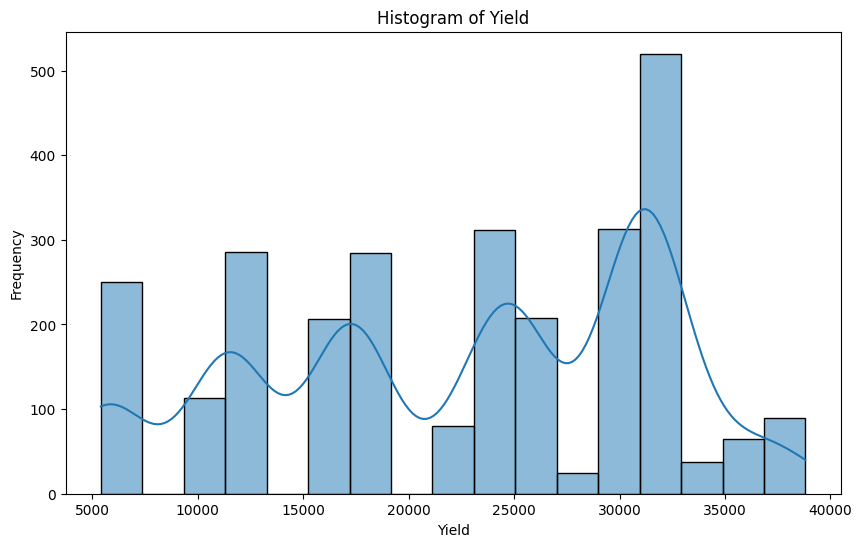

In [0]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Paddy yield(in Kg)', data=paddy_data, kde=True)
plt.title('Histogram of Yield')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()

THe yield shows multimodal distribution, with multiple peaks in the distribution. This indicates that there are multiple groups of data points with different characteristics that are contributing to the overall distribution. This could be due to various factors such as differences in soil quality, weather conditions, or farming practices among different regions or fields. There a high proportion of data points with yield around 30000. 

### Correlation

In [0]:
plt.figure(figsize=(14,14))
correlation = paddy_data.corr()

correlation_df = pd.DataFrame(correlation, columns=paddy_data.columns)
correlation_df

,Hectares,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,Weed28D_thiobencarb,Urea_40Days,Potassh_50Days,Micronutrients_70Days,Pest_60Day(in ml),30DRain( in mm),30DAI(in mm),30_50DRain( in mm),30_50DAI(in mm),51_70DRain(in mm),51_70AI(in mm),71_105DRain(in mm),71_105DAI(in mm),Min temp_D1_D30,Max temp_D1_D30,Min temp_D31_D60,Max temp_D31_D60,Min temp_D61_D90,Max temp_D61_D90,Min temp_D91_D120,Max temp_D91_D120,Inst Wind Speed_D1_D30(in Knots),Inst Wind Speed_D31_D60(in Knots),Inst Wind Speed_D61_D90(in Knots),Inst Wind Speed_D91_D120(in Knots),Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg),Wind Direction_D1_D30_sin,Wind Direction_D1_D30_cos,Wind Direction_D31_D60_sin,Wind Direction_D31_D60_cos,Wind Direction_D61_D90_sin,Wind Direction_D61_D90_cos,Wind Direction_D91_D120_sin,Wind Direction_D91_D120_cos,Agriblock_Cuddalore,Agriblock_Kallakurichi,Agriblock_Kurinjipadi,Agriblock_Panruti,Agriblock_Sankarapuram,Variety_delux ponni,Variety_ponmani,Soil Types_clay,Nursery_wet
Hectares,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.004266,0.004266,0.003618,-0.003618,0.008748,-0.008748,0.003618,-0.003618,0.016685,-0.008526,0.007860,-0.011670,0.015222,0.014575,0.002892,0.014089,0.017101,0.009347,0.017292,0.009320,-0.015911,0.000080,-0.005836,-0.005949,0.967012,0.994649,0.002970,-0.013681,-0.011166,-0.011179,-0.018399,-0.013389,-0.001941,0.010658,-0.003294,-0.011455,0.003494,-0.008967,0.022958,-0.002390,0.001939,-0.000631,0.005964
Seedrate(in Kg),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.004266,0.004266,0.003618,-0.003618,0.008748,-0.008748,0.003618,-0.003618,0.016685,-0.008526,0.007860,-0.011670,0.015222,0.014575,0.002892,0.014089,0.017101,0.009347,0.017292,0.009320,-0.015911,0.000080,-0.005836,-0.005949,0.967012,0.994649,0.002970,-0.013681,-0.011166,-0.011179,-0.018399,-0.013389,-0.001941,0.010658,-0.003294,-0.011455,0.003494,-0.008967,0.022958,-0.002390,0.001939,-0.000631,0.005964
LP_Mainfield(in Tonnes),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.004266,0.004266,0.003618,-0.003618,0.008748,-0.008748,0.003618,-0.003618,0.016685,-0.008526,0.007860,-0.011670,0.015222,0.014575,0.002892,0.014089,0.017101,0.009347,0.017292,0.009320,-0.015911,0.000080,-0.005836,-0.005949,0.967012,0.994649,0.002970,-0.013681,-0.011166,-0.011179,-0.018399,-0.013389,-0.001941,0.010658,-0.003294,-0.011455,0.003494,-0.008967,0.022958,-0.002390,0.001939,-0.000631,0.005964
Nursery area (Cents),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.004266,0.004266,0.003618,-0.003618,0.008748,-0.008748,0.003618,-0.003618,0.016685,-0.008526,0.007860,-0.011670,0.015222,0.014575,0.002892,0.014089,0.017101,0.009347,0.017292,0.009320,-0.015911,0.000080,-0.005836,-0.005949,0.967012,0.994649,0.002970,-0.013681,-0.011166,-0.011179,-0.018399,-0.013389,-0.001941,0.010658,-0.003294,-0.011455,0.003494,-0.008967,0.022958,-0.002390,0.001939,-0.000631,0.005964
LP_nurseryarea(in Tonnes),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.004266,0.004266,0.003618,-0.003618,0.008748,-0.008748,0.003618,-0.003618,0.016685,-0.008526,0.007860,-0.011670,0.015222,0.014575,0.002892,0.014089,0.017101,0.009347,0.017292,0.009320,-0.015911,0.000080,-0.005836,-0.005949,0.967012,0.994649,0.002970,-0.013681,-0.011166,-0.011179,-0.018399,-0.013389,-0.001941,0.010658,-0.003294,-0.011455,0.003494,-0.008967,0.022958,-0.002390,0.001939,-0.000631,0.005964
DAP_20days,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.004266,0.004266,0.003618,-0.003618,0.008748,-0.008748,0.003618,-0.003618,0.016685,-0.008526,0.007860,-0.011670,0.015222,0.014575,0.002

<Figure size 1400x1400 with 0 Axes>

### Multicollinearity check: Variance inflation factor

In [0]:
# Severe Multicollinearity is being observed
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Separate features (X) and target (y)
X = paddy_data.drop(columns=['Paddy yield(in Kg)'])

# Step 2: Ensure X contains only numeric columns
X = X.select_dtypes(include=['int64', 'float64'])

# Step 3: Compute VIF correctly
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif.sort_values(by='VIF', ascending=False)


/databricks/python/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,Hectares,inf
25,Min temp_D91_D120,inf
27,Inst Wind Speed_D1_D30(in Knots),inf
28,Inst Wind Speed_D31_D60(in Knots),inf
29,Inst Wind Speed_D61_D90(in Knots),inf
30,Inst Wind Speed_D91_D120(in Knots),inf
31,Relative Humidity_D1_D30,inf
32,Relative Humidity_D31_D60,inf
33,Relative Humidity_D61_D90,inf
34,Relative Humidity_D91_D120,inf


Variance Inflation Factor analysis indicated severe multicollinearity due to deterministic relationships among area-based inputs, rainfall metrics, and cyclical encodings. Since Artificial Neural Networks do not assume linear independence among features, redundant variables were removed based on domain knowledge rather than VIF thresholds.

During exploratory data analysis, certain variables were found to be exact duplicates of others, indicating data-entry or column-alignment issues. Specifically, LP_nurseryarea(in Tonnes) was identical to Hectares, and Weed28D_thiobencarb matched Nursery area (Cents) across all observations. These variables were therefore removed to maintain data integrity and avoid spurious learning.

Seedrate: 25 * Hectares,   
LP_Mainfield:  Hectares * 25/2  ,   
Nursery area: Hectares * 20 ,  
LP_Nursery area:  Hecatres ,  
DAP_20:  Hectares * 40,    
Weed:   Hectares  * 2,   
Urea:  27.13 * Hectares,   
Potash:   Hectares * 10 (app.)  , 
Micronutriesnts: Hectares * 15,              
Pest_60Days:   Hectares *  600

So, these variables are of:
Input i=ci * Hectares

Management inputs such as seed rate, fertilizer dosage, pesticide application, and nursery parameters were found to follow fixed agronomic recommendations proportional to cultivated area. These input variables are all derived from the feature Hecatres thus representing the deterministic Linear function of the Hectare variable. According to the ML, these are not actual features but they are all constants, scaled by the land area. Mathematically thay add zero degrees of freedom. As these variables exhibited no independent variability, they were excluded from the model to prevent deterministic redundancy and shortcut learning in the ANN.
#### Retaining the Hectares feature, and dropping the linear deterministic features


In [0]:
paddy_data = paddy_data.drop(
    columns=['Seedrate(in Kg)',	'LP_Mainfield(in Tonnes)',	'Nursery area (Cents)',	'LP_nurseryarea(in Tonnes)',	'DAP_20days',	'Weed28D_thiobencarb',	'Urea_40Days',	'Potassh_50Days',	'Micronutrients_70Days',	'Pest_60Day(in ml)']
)

#### Multicollinearity is again checked after dropping the high VIF features

In [0]:
# Severe Multicollinearity is being observed
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Separate features (X) and target (y)
X = paddy_data.drop(columns=['Paddy yield(in Kg)'])

# Step 2: Ensure X contains only numeric columns
X = X.select_dtypes(include=['int64', 'float64'])

# Step 3: Compute VIF correctly
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif.sort_values(by='VIF', ascending=False)


/databricks/python/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
3,30_50DRain( in mm),inf
5,51_70DRain(in mm),inf
6,51_70AI(in mm),inf
37,Agriblock_Panruti,4.731291e+07
38,Agriblock_Sankarapuram,4.959947e+06
30,Wind Direction_D61_D90_sin,1.577498e+06
36,Agriblock_Kurinjipadi,1.492430e+06
35,Agriblock_Kallakurichi,1.137479e+06
29,Wind Direction_D31_D60_cos,6.312635e+05
33,Wind Direction_D91_D120_cos,1.407340e+05


Although several predictors exhibited high VIF values due to categorical encoding and cyclic transformations, these were retained as neural networks are not constrained by multicollinearity in the same manner as linear regression models. Only exact linear dependencies were removed.

Seedrate (in Kg): Seedrate refers to the quantity of paddy seed sown for cultivation, measured in kilograms. The Agricultural role determines plant density, affects competition for nutrients, water, and sunlight, excess seedrate means overcrowding and low seedrate means poor crop stand. Seedrate is directly proportional to land area (hectares): Seedrate = Recommended rate per hectare * Area.       Hence, it does not add independent information once area is known.

2. LP_Mainfield (in Tonnes):  Represents the quantity of inputs used during land preparation in the main field, such as organic matter, Soil amendments, Machinery or labor effort (converted to tonnes equivalent). Its Agricultural role is improves soil structure, enhances root penetration, supports early crop establishment. LP_Mainfield scales linearly with cultivated area: LP_Mainfield * Hectares.      Thus, it duplicates area information.

3. Nursery area (Cents):         Area allocated for raising paddy seedlings before transplanting, measured in cents
(1 cent = 1/100 acre). Its Agricultural role is seedling production, controls transplanting density, affects early plant vigor. Nursery area is a fixed fraction of total cultivated area:     Nursery area≈10–15%×Hectares. Therefore, it is deterministically derived from hectares.

4. LP_nurseryarea (in Tonnes):  Represents land preparation effort or inputs used specifically in the nursery area, measured in tonnes.    It's Agricultural role eEnsures healthy seedling growth, improves seedling survival after transplanting. LP_nurseryarea depends on: LP_nurseryarea * Nursery area * Hectares. Thus, it adds no new independent signal.

5. 30DAI (in mm): (30 Days After Irrigation).  Represents artificial irrigation water supplied (in mm) during the first 30 days of crop growth. Agricultural role: Maintains standing water, supports seedling establishment  and compensates rainfall deficit. Irrigation (AI) is complementary to rainfall: Rainfall + Irrigation = Total water requirement. Hence: High rainfall THEN low AI and Low rainfall THEN high AI. This creates perfect negative correlation.

6. 30_50DAI (in mm):   Artificial irrigation applied between 30-50 days after planting (tillering stage). It's Agricultural role encourages tiller formation, supports vegetative growth. Hence, redundant with rainfall variables.

7. 51_70AI (in mm) : Artificial irrigation during panicle initiation stage. It's Agricultural role is critical stage for yield determination. Water stress here drastically reduces yield. Deterministically linked with rainfall in the same stage.

8.  71_105DAI (in mm): Irrigation supplied during grain filling and maturity stages. iT'S Agricultural role maintains grain weight, prevents spikelet sterility.  Complements rainfall; therefore redundant if rainfall is already included.

Seedrate, LP_Mainfield, Nursery area	ARE all Direct function of land area. 
LP_nurseryarea is derived from nursery area. 
AI variables	are perfect complements of rainfall. 

Several agronomic inputs such as seed rate, land preparation quantities, nursery area,  were found to be deterministically derived from cultivated area. To avoid redundant information and improve computational efficiency, these variables were excluded from the neural network model while retaining area as primary explanatory factors.

In [0]:
paddy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hectares                            2789 non-null   int64  
 1   30DRain( in mm)                     2789 non-null   float64
 2   30DAI(in mm)                        2789 non-null   float64
 3   30_50DRain( in mm)                  2789 non-null   float64
 4   30_50DAI(in mm)                     2789 non-null   float64
 5   51_70DRain(in mm)                   2789 non-null   float64
 6   51_70AI(in mm)                      2789 non-null   float64
 7   71_105DRain(in mm)                  2789 non-null   float64
 8   71_105DAI(in mm)                    2789 non-null   float64
 9   Min temp_D1_D30                     2789 non-null   float64
 10  Max temp_D1_D30                     2789 non-null   int64  
 11  Min temp_D31_D60                    2789 no

#### Checking outliers:

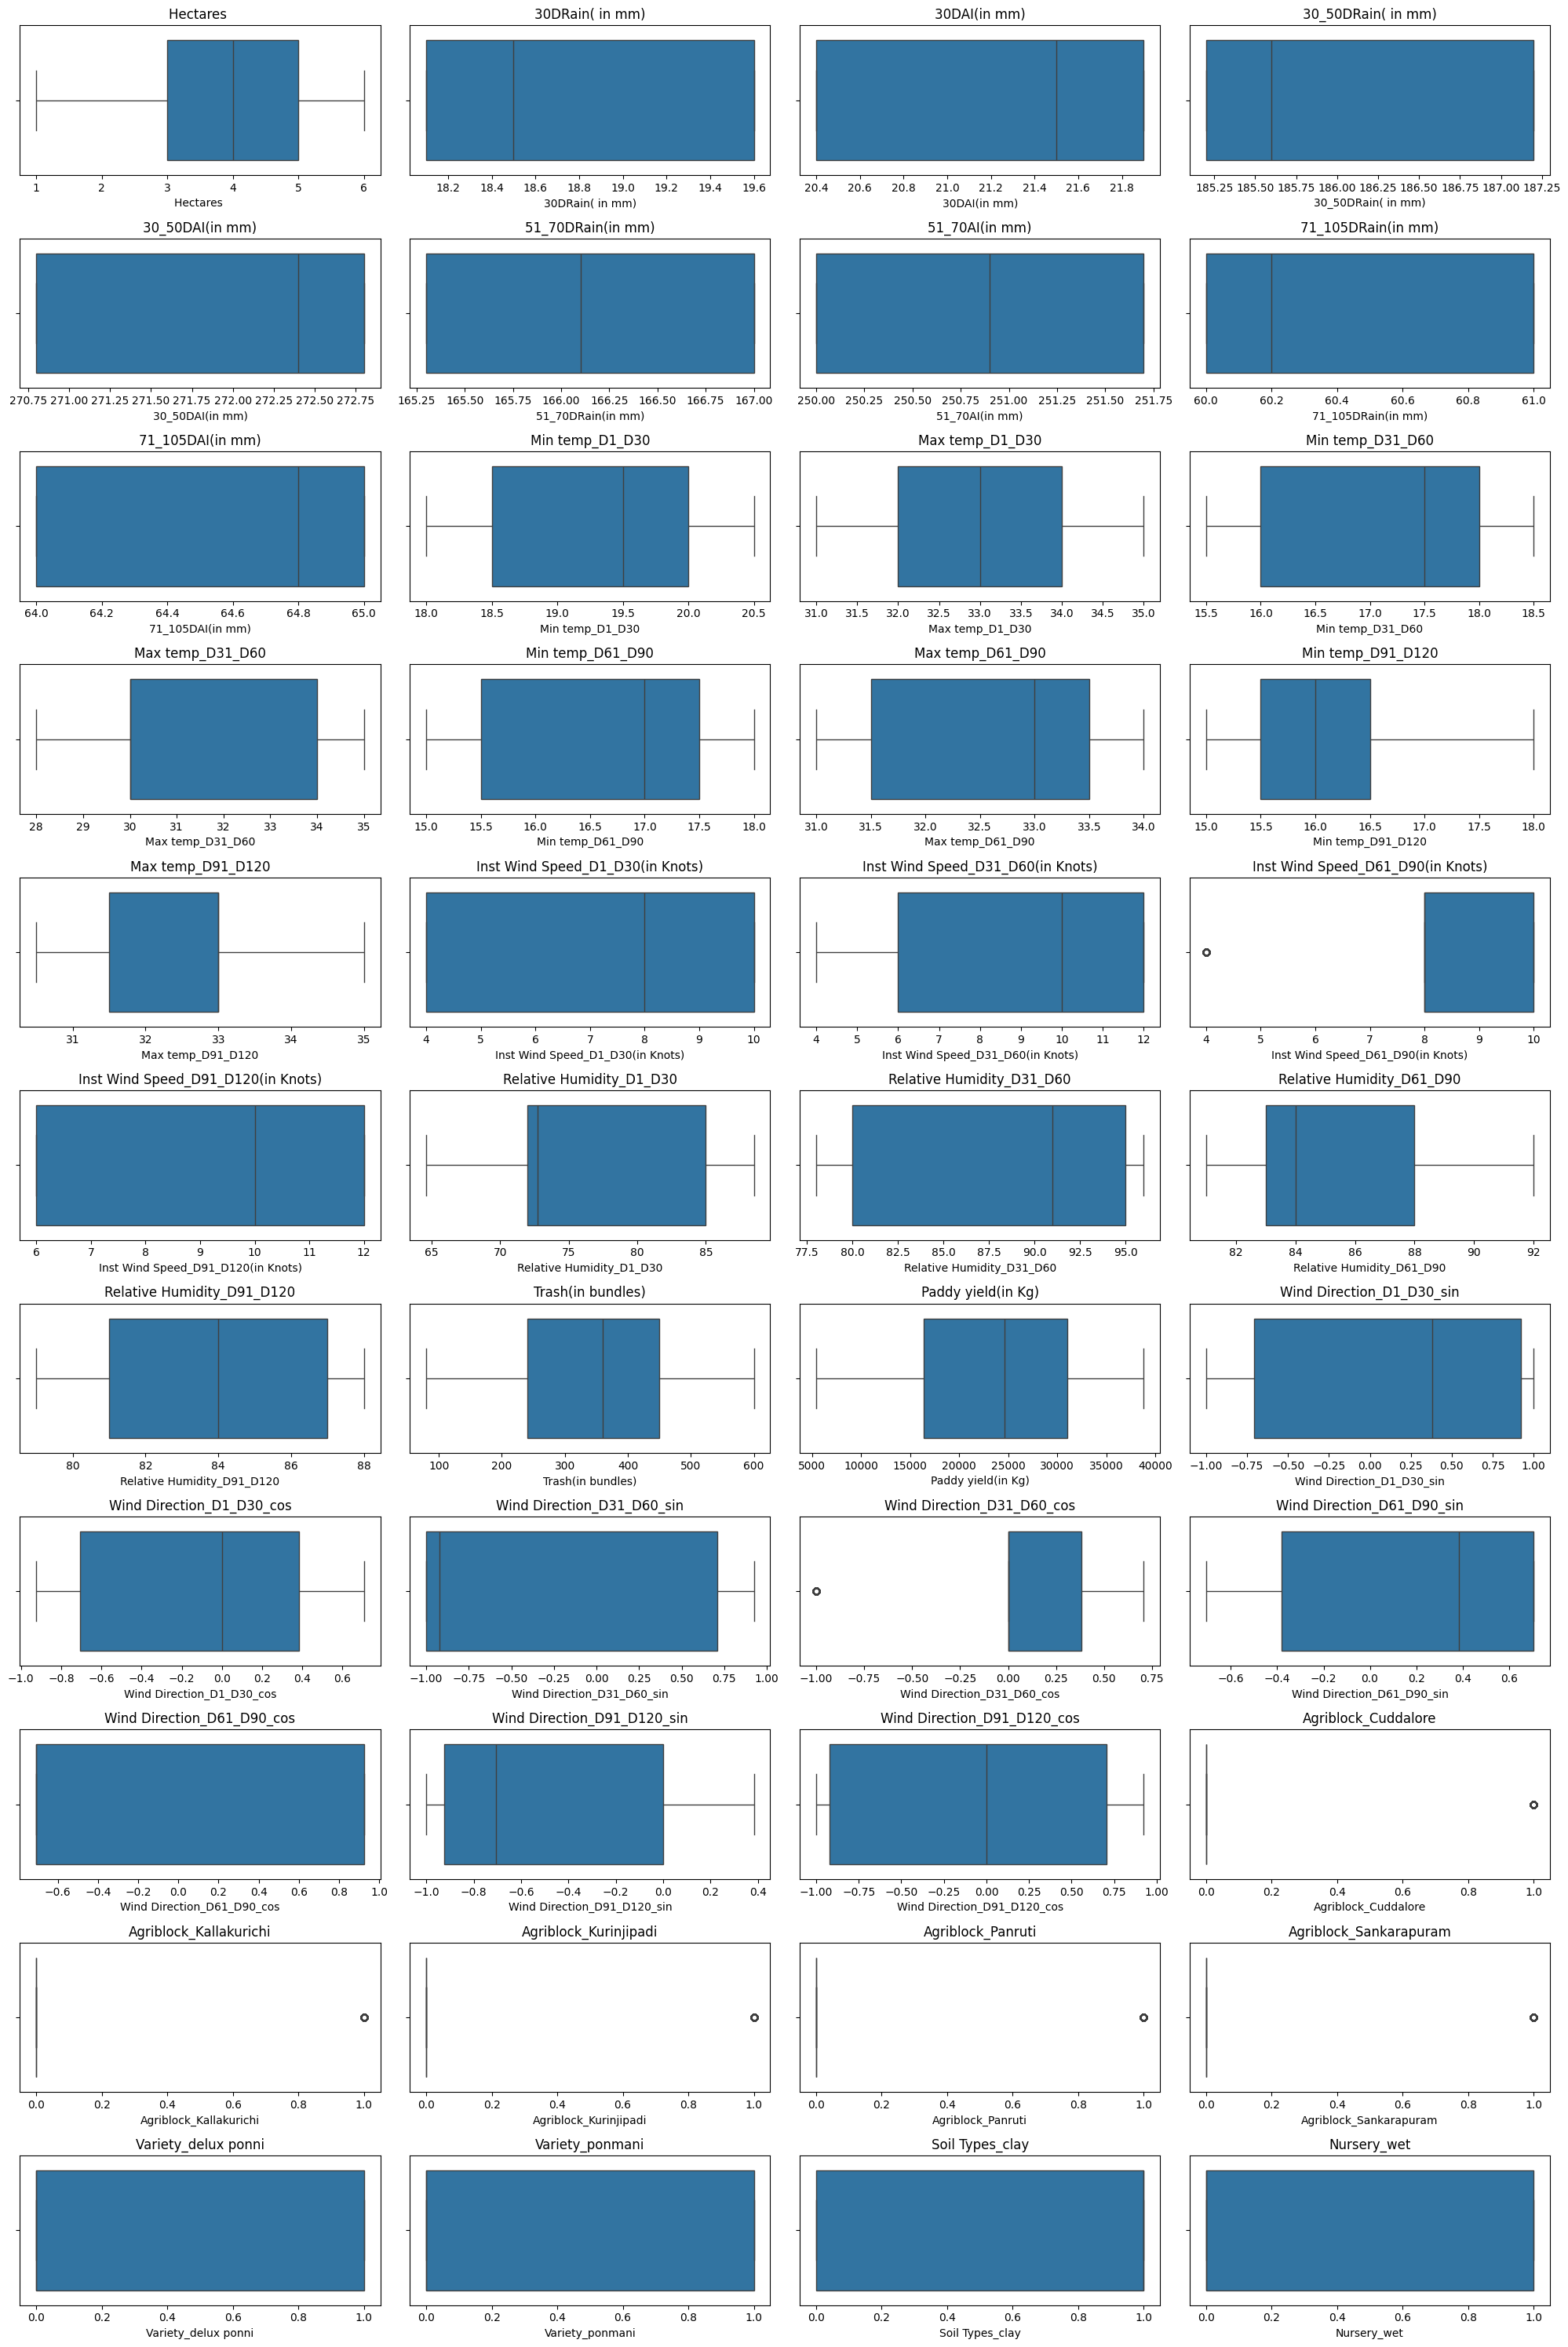

In [0]:
# Checking outliers:
plt.figure(figsize=(20,30))
for i, col in enumerate(paddy_data.columns):
    plt.subplot(11,4,i+1)   # 7 rows, 4 columns
    sns.boxplot(x=paddy_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


#### Testing for normality using Shapiro and Q-Q plots


In [0]:
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

for col in paddy_data.columns:
    stat, p = shapiro(paddy_data[col])
    print(f'Shapiro test for {col}:')
    print(f'Statistic = {stat}, p-value = {p}')
    print('Normal distribution' if p > 0.05 else 'Not normal distribution')
    print('')


Shapiro test for Hectares :
Statistic = 0.9113417372545293, p-value = 1.3720729551792728e-37
Not normal distribution

Shapiro test for 30DRain( in mm):
Statistic = 0.7333769548794302, p-value = 3.9918175638049345e-55
Not normal distribution

Shapiro test for 30DAI(in mm):
Statistic = 0.7333769548793982, p-value = 3.9918175637857394e-55
Not normal distribution

Shapiro test for 30_50DRain( in mm):
Statistic = 0.7116126412804307, p-value = 1.6551878844740349e-56
Not normal distribution

Shapiro test for 30_50DAI(in mm):
Statistic = 0.7116126412804695, p-value = 1.6551878844831268e-56
Not normal distribution

Shapiro test for 51_70DRain(in mm):
Statistic = 0.7989617830209148, p-value = 2.685247315851342e-50
Not normal distribution

Shapiro test for 51_70AI(in mm):
Statistic = 0.7989617830208896, p-value = 2.6852473158383484e-50
Not normal distribution

Shapiro test for 71_105DRain(in mm):
Statistic = 0.7116126412804307, p-value = 1.6551878844740349e-56
Not normal distribution

Shapiro tes

Shapiro-Wilk tests indicated that none of the predictor variables followed a normal distribution. However, normality is not a prerequisite for Artificial Neural Networks. Since ANN models are distribution-free and rely on numerical stability rather than parametric assumptions, the features were standardized using z-score normalization (StandardScaler) prior to training.

#### Renaming the column names for ML Compatability

In [0]:
# Renaming the feature names:
paddy_data.rename(columns={'Hectares ': 'Hectares', '30DRain( in mm)': '30DRain_mm', '30DAI(in mm)': '30DAI_mm', '30_50DRain( in mm)': '30_50DRain_mm', '30_50DAI(in mm)': '30_50DAI_mm', '51_70DRain(in mm)': '51_70DRain_mm', '51_70AI(in mm)': '51_70AI_mm', '71_105DRain(in mm)': '71_105DRain_mm', '71_105DAI(in mm)': '71_105DAI_mm', 'Min temp_D1_D30': 'Min_temp_D1_D30', 'Max temp_D1_D30': 'Max_temp_D1_D30', 'Min temp_D31_D60': 'Min_temp_D31_D60', 'Max temp_D31_D60': 'Max_temp_D31_D60', 'Min temp_D61_D90': 'Min_temp_D61_D90', 'Max temp_D61_D90': 'Max_temp_D61_D90', 'Min temp_D91_D120': 'Min_temp_D91_D120', 'Max temp_D91_D120': 'Max_temp_D91_D120', 'Inst Wind Speed_D1_D30(in Knots)': 'Inst_Wind_Speed_D1_D30', 'Inst Wind Speed_D31_D60(in Knots)': 'Inst_Wind_Speed_D31_D60', 'Inst Wind Speed_D61_D90(in Knots)': 'Inst_Wind_Speed_D61_D90', 'Inst Wind Speed_D91_D120(in Knots)': 'Inst_Wind_Speed_D91_D120', 'Relative Humidity_D1_D30': 'Relative_Humidity_D1_D30', 'Relative Humidity_D31_D60': 'Relative_Humidity_D31_D60', 'Relative Humidity_D61_D90': 'Relative_Humidity_D61_D90', 'Relative Humidity_D91_D120': 'Relative_Humidity_D91_D120', 'Trash(in bundles)': 'Trash_bundles', 'Paddy yield(in Kg)': 'Paddy_yield_kg', 'Wind Direction_D1_D30_sin': 'Wind_Direction_D1_D30_sin', 'Wind Direction_D1_D30_cos': 'Wind_Direction_D1_D30_cos', 'Wind Direction_D31_D60_sin': 'Wind_Direction_D31_D60_sin', 'Wind Direction_D31_D60_cos': 'Wind_Direction_D31_D60_cos', 'Wind Direction_D61_D90_sin': 'Wind_Direction_D61_D90_sin', 'Wind_Direction_D61_D90_cos': 'Wind_Direction_D61_D90_cos', 'Wind Direction_D91_D120_sin': 'Wind_Direction_D91_D120_sin', 'Wind Direction_D91_D120_cos': 'Wind_Direction_D91_D120_cos', 'Agriblock_Cuddalore': 'Agriblock_Cuddalore', 'Agriblock_Krishnagiri': 'Agriblock_Krishnagiri', 'Agriblock_Kumbakonam': 'Agriblock_Kumbakonam', 'Agriblock_Panruti': 'Agriblock_Panruti', 'Agriblock_Sankarapuram': 'Agriblock_Sankarapuram', 'Variety_delux ponni': 'Variety_delux_ponni', 'Variety_ponmani': 'Variety_ponmani', 'Soil Types_clay': 'Soil_Types_clay', 'Nursery_wet': 'Nursery_wet'}, inplace=True)


### Checking the datatypes of features before Modelling

In [0]:
paddy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Hectares                     2789 non-null   int64  
 1   30DRain_mm                   2789 non-null   float64
 2   30DAI_mm                     2789 non-null   float64
 3   30_50DRain_mm                2789 non-null   float64
 4   30_50DAI_mm                  2789 non-null   float64
 5   51_70DRain_mm                2789 non-null   float64
 6   51_70AI_mm                   2789 non-null   float64
 7   71_105DRain_mm               2789 non-null   float64
 8   71_105DAI_mm                 2789 non-null   float64
 9   Min_temp_D1_D30              2789 non-null   float64
 10  Max_temp_D1_D30              2789 non-null   int64  
 11  Min_temp_D31_D60             2789 non-null   float64
 12  Max_temp_D31_D60             2789 non-null   int64  
 13  Min_temp_D61_D90  

### Defining X and y for standardising and Modelling:

In [0]:
X = paddy_data.drop(columns=['Paddy_yield_kg'])
y = paddy_data['Paddy_yield_kg']

Feature Type that are continuous numeric, are standardised as it improve gradient descent & convergence. Sin/Cos (angle encoding) are not encoded as it has already normalized to [-1,1]. One-hot categorical features are not encoded, as 0/1 values carry categorical meaning.

### Splitting the data in 80:20 using train_test_split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Diagnosing the X_train

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2231 entries, 599 to 860
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Hectares                     2231 non-null   int64  
 1   30DRain_mm                   2231 non-null   float64
 2   30DAI_mm                     2231 non-null   float64
 3   30_50DRain_mm                2231 non-null   float64
 4   30_50DAI_mm                  2231 non-null   float64
 5   51_70DRain_mm                2231 non-null   float64
 6   51_70AI_mm                   2231 non-null   float64
 7   71_105DRain_mm               2231 non-null   float64
 8   71_105DAI_mm                 2231 non-null   float64
 9   Min_temp_D1_D30              2231 non-null   float64
 10  Max_temp_D1_D30              2231 non-null   int64  
 11  Min_temp_D31_D60             2231 non-null   float64
 12  Max_temp_D31_D60             2231 non-null   int64  
 13  Min_temp_D61_D90      

In [0]:
X_train.iloc[:, 0:26]

,Hectares,30DRain_mm,30DAI_mm,30_50DRain_mm,30_50DAI_mm,51_70DRain_mm,51_70AI_mm,71_105DRain_mm,71_105DAI_mm,Min_temp_D1_D30,Max_temp_D1_D30,Min_temp_D31_D60,Max_temp_D31_D60,Min_temp_D61_D90,Max_temp_D61_D90,Min_temp_D91_D120,Max_temp_D91_D120,Inst_Wind_Speed_D1_D30,Inst_Wind_Speed_D31_D60,Inst_Wind_Speed_D61_D90,Inst_Wind_Speed_D91_D120,Relative_Humidity_D1_D30,Relative_Humidity_D31_D60,Relative_Humidity_D61_D90,Relative_Humidity_D91_D120,Trash_bundles
599,5,18.1,21.9,185.6,272.4,166.1,250.9,60.2,64.8,20.5,32,17.5,28,18.0,34.0,16.5,35.0,10,12,10,12,72.7,91,83,81,400
1378,4,19.6,20.4,187.2,270.8,167.0,250.0,61.0,64.0,19.5,34,18.5,35,17.0,32.5,16.0,30.5,10,4,10,6,64.6,85,84,87,320
1717,3,18.5,21.5,185.2,272.8,165.3,251.7,60.0,65.0,19.0,33,17.0,32,16.5,31.5,15.5,32.5,8,6,8,6,88.5,95,81,84,300
100,6,18.1,21.9,185.6,272.4,166.1,250.9,60.2,64.8,20.5,32,17.5,28,18.0,34.0,16.5,35.0,10,12,10,12,72.7,91,83,81,480
315,5,19.6,20.4,187.2,270.8,167.0,250.0,61.0,64.0,19.5,34,18.5,35,17.0,32.5,16.0,30.5,10,4,10,6,64.6,85,84,87,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,4,18.5,21.5,185.2,272.8,165.3,251.7,60.0,65.0,20.0,35,18.0,30,17.5,33.5,18.0,33.0,4,12,4,12,85.0,96,84,79,360
1095,4,18.1,21.9,185.6,272.4,166.1,250.9,60.2,64.8,18.0,31,15.5,34,15.0,33.0,15.0,31.5,6,6,8,10,78.6,80,92,88,360
1130,4,18.1,21.9,185.6,272.4,166.1,250.9,60.2,64.8,20.5,32,17.5,28,18.0,34.0,16.5,35.0,10,12,10,12,72.7,91,83,81,320
1294,4,18.1,21.9,185.6,272.4,166.1,250.9,60.2,64.8,20.5,32,17.5,28,18.0,34.0,16.5,35.0,10,12,10,12,72.7,91,83,81,320


### Standardising the X_train, X_test, y_train and y_test. 
Converting the y to numpy and reshaping to tune with the Neural Network standards. The continuous numeric features are standardised manually (X - np.mean(X))/np.std(X). The One hot categorical features and the Sin/Cos are finally concatenated with the standardised X features.

In [0]:

# Select continuous columns to standardize (0–25)
cont_cols = X_train.columns[0:26]   # numeric continuous features
other_cols = X_train.columns[26:]   # sin/cos + one-hot categorical

# Compute mean and std only for continuous columns
X_mean = X_train[cont_cols].mean()
X_std = X_train[cont_cols].std()

# Standardize continuous columns
X_train_scaled_cont = (X_train[cont_cols] - X_mean) / X_std
X_test_scaled_cont  = (X_test[cont_cols]  - X_mean) / X_std

# Keep other columns unchanged
X_train_other = X_train[other_cols]
X_test_other  = X_test[other_cols]

# Combine standardized continuous + unchanged columns
X_train= pd.concat([X_train_scaled_cont, X_train_other], axis=1)
X_test  = pd.concat([X_test_scaled_cont, X_test_other], axis=1)

# computing the mean and std for y_train 
y_mean = np.mean(y_train, axis=0)
y_std = np.std(y_train, axis=0)

# standardising the y_train and y_test
y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

# y_train may be pandas Series
y_train_scaled = np.asarray(y_train_scaled).reshape(-1, 1)

# y_test_scaled is already numpy
y_test_scaled = np.asarray(y_test_scaled).reshape(-1, 1)

if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy().reshape(-1,1)
else:
    y_test = y_test.reshape(-1,1)

#### Scaling of the numerical features:
1. Continuous features standardized only : Standardization (X - mean)/std ensures zero mean and unit variance, which helps neural networks converge faster.

2. Sin/cos and one-hot categorical features are untouched

3. Categorical one-hot encodings remain in their original scale (0/1 for one-hot, -1 to 1 for sin/cos).

4. Target scaling: Standardizing y_train and y_test is standard when using tanh or sigmoid outputs, and reshaping ensures it matches neural network expected shape (n_samples, 1).

5. Final concatenation : Combines standardized and unchanged features back into a single DataFrame, ready for NN input.

### Checking the descriptive statistics of the X_train to find the range

In [0]:
X_train.describe()

,Hectares,30DRain_mm,30DAI_mm,30_50DRain_mm,30_50DAI_mm,51_70DRain_mm,51_70AI_mm,71_105DRain_mm,71_105DAI_mm,Min_temp_D1_D30,Max_temp_D1_D30,Min_temp_D31_D60,Max_temp_D31_D60,Min_temp_D61_D90,Max_temp_D61_D90,Min_temp_D91_D120,Max_temp_D91_D120,Inst_Wind_Speed_D1_D30,Inst_Wind_Speed_D31_D60,Inst_Wind_Speed_D61_D90,Inst_Wind_Speed_D91_D120,Relative_Humidity_D1_D30,Relative_Humidity_D31_D60,Relative_Humidity_D61_D90,Relative_Humidity_D91_D120,Trash_bundles,Wind_Direction_D1_D30_sin,Wind_Direction_D1_D30_cos,Wind_Direction_D31_D60_sin,Wind_Direction_D31_D60_cos,Wind_Direction_D61_D90_sin,Wind Direction_D61_D90_cos,Wind_Direction_D91_D120_sin,Wind_Direction_D91_D120_cos,Agriblock_Cuddalore,Agriblock_Kallakurichi,Agriblock_Kurinjipadi,Agriblock_Panruti,Agriblock_Sankarapuram,Variety_delux_ponni,Variety_ponmani,Soil_Types_clay,Nursery_wet
count,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2.231000e+03,2231.000000,2.231000e+03,2231.000000,2.231000e+03,2231.000000,2231.000000,2.231000e+03,2.231000e+03,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000
mean,1.146550e-16,1.178399e-15,-1.178399e-15,-2.387373e-14,4.491930e-14,2.240869e-14,-1.067343e-13,9.494074e-15,-9.494074e-15,-1.107536e-15,-1.242096e-16,-1.614725e-15,-6.433421e-16,-5.302795e-16,2.706337e-15,-6.449346e-17,-1.114702e-17,-1.058967e-16,1.409301e-16,-2.531965e-16,1.146550e-16,-5.032082e-16,-5.860146e-16,-2.038312e-16,9.076857e-16,-1.433188e-17,-0.002715,-1.406932e-01,-0.268678,5.577388e-02,0.171352,0.020887,-4.513894e-01,-6.765471e-02,0.161811,0.147468,0.166741,0.152398,0.219184,0.354101,0.381892,0.545047,0.445988
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.791577,5.950158e-01,0.800778,5.327956e-01,0.599758,0.781618,4.931509e-01,7.408290e-01,0.368360,0.354651,0.372828,0.359487,0.413786,0.478347,0.485959,0.498078,0.497186
min,-1.874433e+00,-9.547683e-01,-1.382392e+00,-9.464379e-01,-1.402809e+00,-1.268546e+00,-1.251338e+00,-9.464379e-01,-1.402809e+00,-1.516379e+00,-1.591921e+00,-1.565748e+00,-1.305742e+00,-1.552958e+00,-1.542785e+00,-1.313348e+00,-1.489160e+00,-1.253397e+00,-1.424693e+00,-2.092270e+00,-1.394240e+00,-1.479368e+00,-1.407810e+00,-1.192040e+00,-1.544748e+00,-1.887625e+00,-1.000000,-9.238795e-01,-1.000000,-1.000000e+00,-0.707107,-0.707107,-1.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.903986e-01,-9.547683e-01,-1.382392e+00,-9.464379e-01,-1.402809e+00,-1.268546e+00,-1.251338e+00,-9.464379e-01,-1.402809e+00,-9.468432e-01,-8.372299e-01,-1.082997e+00,-5.143508e-01,-1.089149e+00,-1.080095e+00,-7.607112e-01,-8.181209e-01,-1.253397e+00,-7.975242e-01,-8.156383e-02,-1.394240e+00,-5.468682e-01,-1.113643e+00,-6.250556e-01,-9.080123e-01,-7.031601e-01,-0.707107,-7.071068e-01,-1.000000,-1.836970e-16,-0.382683,-0.707107,-9.238795e-01,-9.238795e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.016186e-01,-3.315255e-01,3.315255e-01,-4.765885e-01,4.765885e-01,-8.271829e-02,8.271829e-02,-4.765885e-01,4.765885e-01,1.922278e-01,-8.253903e-02,3.652546e-01,-5.143508e-01,3.022759e-01,3.079763e-01,-2.080747e-01,1.884385e-01,3.083616e-01,4.568124e-01,-8.156383e-02,2.054254e-01,-4.586587e-01,5.042775e-01,-3.415632e-01,4.709163e-02,1.851888e-01,0.382683,-1.836970e-16,-0.923880,-1.836970e-16,0.382683,-0.707107,-7.071068e-01,-1.836970e-16,0.000000,0.000000,0.00

### Finding the range of y_train_scaled for deciding on the activation functions.

In [0]:
y_min = np.min(y_train_scaled)
y_max = np.max(y_train_scaled)
y_mean = np.mean(y_train_scaled)

print(f"Min yield: {y_min}")
print(f"Max yield: {y_max}")
print(f"Mean yield: {y_mean:.4f}")

Min yield: -1.8452555508315471
Max yield: 1.7680411840360837
Mean yield: 0.0000


### Forward Pass:

#### X ------ Z(1) ------- a(1) ------- Z(2) ------ Y PRED --------L
1. Z(1) = W(1).X                            
2. a(1) = f(Z(1))                                     
3. Z(2) = W(2).a(1)
4. Y_PRED = f(Z(2))
5. L = (Y-Y_PRED)**2

##### Initializing ANN parameters
# Experiment 1:    Architecture:
1. Inputs: 43 features (X)
2. Hidden layer: 1 neuron
3. Output layer: 1 neuron
4. No biases
5. Activation function: Sigmoid for hidden and RELU for output
#### Checking the shape of the X_train and X_test

In [0]:
X_train.shape, X_test.shape

((2231, 43), (558, 43))

### Standardising of X_train, X_test, y_train, y_test and reshaping.

In [0]:
cont_cols = X_train.columns[0:26]   # numeric continuous features
other_cols = X_train.columns[26:]   # sin/cos + one-hot categorical

# Compute mean and std only for continuous columns
X_mean = X_train[cont_cols].mean()
X_std = X_train[cont_cols].std()

# Standardize continuous columns
X_train_scaled_cont = (X_train[cont_cols] - X_mean) / X_std
X_test_scaled_cont  = (X_test[cont_cols]  - X_mean) / X_std

# Keep other columns unchanged
X_train_other = X_train[other_cols]
X_test_other  = X_test[other_cols]

# Combine standardized continuous + unchanged columns
X_train= pd.concat([X_train_scaled_cont, X_train_other], axis=1)
X_test  = pd.concat([X_test_scaled_cont, X_test_other], axis=1)

# computing the mean and std for y_train 
y_mean = np.mean(y_train, axis=0)
y_std = np.std(y_train, axis=0)

# standardising the y_train and y_test
y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

# y_train may be pandas Series
y_train_scaled = np.asarray(y_train_scaled).reshape(-1, 1)

# y_test_scaled is already numpy
y_test_scaled = np.asarray(y_test_scaled).reshape(-1, 1)

if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy().reshape(-1,1)
else:
    y_test = y_test.reshape(-1,1)

### Setting the parameters and initialising the weights

In [0]:
# Setting the random seed:
np.random.seed(42)

# Inputs (43 features)  and 1 hidden neuron and 1 output (Yield)
n_inputs = X_train.shape[1]
n_hidden = 1
n_output = 1
learning_rate = 0.01

# Randomly initialize weights
# W1 = np.random.randn(n_hidden, n_inputs) *   # weights input -> hidden (1x43)
# W2 = np.random.randn(n_output, n_hidden)  # weights hidden -> output (1x1)

W1 = np.random.randn(n_hidden, n_inputs) * np.sqrt(1. / n_inputs)
W2 = np.random.randn(n_output, n_hidden) * np.sqrt(1. / n_hidden)

### Defining the activation function and its derivative. 
### Forward Pass: Finding Z1

In [0]:
# Activation function

# tanh activation for hidden layer
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# --- FORWARD PASS ---

# Step 1: Hidden layer pre-activation
Z1 = np.dot(X_train, W1.T)
print(Z1)
print(f"min of Z1 is {np.min(Z1)} and max of Z1 is  {np.max(Z1)}")

[[-1.16461717]
 [ 0.21049095]
 [ 0.46635085]
 ...
 [-1.20941796]
 [-1.18328454]
 [ 1.28141647]]
min of Z1 is -1.4431339338588818 and max of Z1 is  1.423838197930624


The hidden layer pre-activation values Z1 were observed to lie approximately within the range [−1.44,1.42]. Applying different activation functions transforms these values differently: Sigmoid squashes them into the range [0,1],  tanh maps them into [−1,1], ReLU sets negative values to zero while keeping positive values unchanged. In the first five baseline experiments, these activation functions were evaluated under identical conditions to compare their impact on training convergence and generalisation performance.
### Step 2: Hidden layer activation

In [0]:
A1 = tanh(Z1) 
print(A1)
print(f"min of A1 is {np.min(A1)} and max of A1 is  {np.max(A1)}")

[[-0.82253889]
 [ 0.20743638]
 [ 0.43524616]
 ...
 [-0.83650481]
 [-0.82848449]
 [ 0.85686185]]
min of A1 is -0.8943268377266496 and max of A1 is  0.8903968967511995


With tanh activation function, the range of A1 is [- 0.89, 0.89]. 
### Step 3: Output layer pre-activation

In [0]:
Z2 = np.dot(A1, W2) 
print(Z2)
print(f"min of Z2 is {np.min(Z2)} and max of Z2 is  {np.max(Z2)}")

[[ 0.2476695 ]
 [-0.06245986]
 [-0.13105423]
 ...
 [ 0.25187469]
 [ 0.24945974]
 [-0.25800427]]
min of Z2 is -0.26810179615302054 and max of Z2 is  0.26928511590417636


### Step 4: Output layer activation (prediction)
The scaled target variable ranges approximately from -1.85 to 1.77. Sigmoid restricts outputs to [0,1], ReLU restricts outputs to [0,∞), and tanh restricts outputs to [-1,1]. Since the target exceeds these bounded ranges, using these activations in the output layer would constrain predictions and introduce systematic error. Therefore, a linear activation is most appropriate for regression tasks.
Hidden layer activations can be nonlinear (tanh, ReLU, sigmoid). But output layer activation depends on: 
Classification (sigmoid/softmax), Regression (linear). Range of Linear function: (−∞,+∞). No restriction.
Can represent the full scaled target range. That’s why linear is standard for regression.

In [0]:
y_train_pred = Z2    
print(y_train_pred)
print(f"min of y_train_pred is {np.min(y_train_pred)} and max of y_train_pred is  {np.max(y_train_pred)}")

[[ 0.2476695 ]
 [-0.06245986]
 [-0.13105423]
 ...
 [ 0.25187469]
 [ 0.24945974]
 [-0.25800427]]
min of y_train_pred is -0.26810179615302054 and max of y_train_pred is  0.26928511590417636


### Calculating the loss : MSE & RMSE

In [0]:
print("Z1 (hidden pre-activation):\n", Z1)
print("A1 (hidden activation):\n", A1)
print("Z2 (output pre-activation):\n", Z2)
print("Y_pred (output prediction):\n", y_train_pred)

loss = np.mean((y_train_scaled - y_train_pred)**2)
rmse = np.sqrt(loss)  
print(f" MSE Loss: {loss} and  RMSE Loss: {rmse} on training data")

Z1 (hidden pre-activation):
 [[-1.16461717]
 [ 0.21049095]
 [ 0.46635085]
 ...
 [-1.20941796]
 [-1.18328454]
 [ 1.28141647]]
A1 (hidden activation):
 [[-0.82253889]
 [ 0.20743638]
 [ 0.43524616]
 ...
 [-0.83650481]
 [-0.82848449]
 [ 0.85686185]]
Z2 (output pre-activation):
 [[ 0.2476695 ]
 [-0.06245986]
 [-0.13105423]
 ...
 [ 0.25187469]
 [ 0.24945974]
 [-0.25800427]]
Y_pred (output prediction):
 [[ 0.2476695 ]
 [-0.06245986]
 [-0.13105423]
 ...
 [ 0.25187469]
 [ 0.24945974]
 [-0.25800427]]
 MSE Loss: 1.058142162098188 and  RMSE Loss: 1.0286603725711359 on training data


### Next Step:  Backpropogation   
1. Gradient of loss w.r.t output         
Loss w.r.t prediction:   L = (y-y_pred)**2 

In [0]:
dL_dy_pred = 2 * (y_train_pred - y_train_scaled) / len(y_train_scaled)

2.  Since output is linear: DY_PRED_DZ2 = (Z2): 

In [0]:
dy_pred_dZ2 = 1

3. Gradient of Z2 w.r.t W2

In [0]:
dZ2_dW2 = A1

4. Chain Rule: 
DL_D_YPRED * D_YPRED_DZ2 * DZ2_DW2

In [0]:
dL_dZ2 = dL_dy_pred * dy_pred_dZ2
dL_dW2 = dL_dZ2.T @ dZ2_dW2

5.  Finding W1:
DL/D_YPRED * D_YPRED/DZ2 * DZ2/DA1 * DA1/DZ1 * DZ1 / DW1

In [0]:
dZ2_dA1 = W2

6. Gradient of Loss w.r.t A1

In [0]:
dL_dA1 = dL_dZ2 @ dZ2_dA1

7. Gradient of A1 w.r.t Z1 (tanh derivative)

In [0]:
dA1_dZ1 = 1 - np.tanh(Z1)**2

8. Gradient of Loss w.r.t Z1

In [0]:
dL_dZ1 = dL_dA1 * dA1_dZ1

9. Gradient of Z1 w.r.t W1
10. Gradient of Loss w.r.t W1

In [0]:
dL_dW1 = dL_dZ1.T @ X_train

11. WEIGHT UPDATE

In [0]:
lr = 0.01
W2 = W2 - (lr * dL_dW2)
W1 = W1 - (lr * dL_dW1)

### Forward pass (again with the updated weights)

In [0]:
Z1 = X_train @ W1.T
A1 = tanh(Z1)

Z2 = A1 @ W2.T
y_train_pred = Z2   # linear output

### Computing the Loss again:

In [0]:
loss = np.mean((y_train_scaled - y_train_pred)**2)
rmse = np.sqrt(loss)  
print(f" MSE Loss: {loss} and  RMSE Loss: {rmse}")

 MSE Loss: 1.0539579393434042 and  RMSE Loss: 1.026624536694601


### TESTING ON THE X_TEST

In [0]:
Z1_test = np.dot(X_test, W1.T)
A1_test = tanh(Z1_test)
Z2_test = np.dot(A1_test, W2.T)
y_test_pred = Z2_test

test_loss = np.mean((y_test_scaled - y_test_pred)**2)
print(f"Test MSE Loss: {test_loss:.4f}")
RMSE = np.sqrt(test_loss)
print(f"Test RMSE Loss: {RMSE}")

Test MSE Loss: 1.0144
Test RMSE Loss: 1.007188271725618


### Converting the scaled y values back to its original units for calculating the MSE, RMSE and relative % of RMSE to its mean.

In [0]:
y_test_pred_original = y_test_pred * y_std + y_mean

test_loss_original = np.mean((y_test - y_test_pred_original)**2)

rmse_original = np.sqrt(test_loss_original)  

mean_yield = np.mean(y_test)
relative_rmse_percent = (rmse_original / mean_yield) * 100

# Print results
print(f"Test MSE (original units): {test_loss_original:.2f} KG")
print(f"Test RMSE (original units): {rmse_original:.2f} KG")
print(f"Relative RMSE (% of mean yield): {relative_rmse_percent:.2f}%")

Test MSE (original units): 86698386.02 KG
Test RMSE (original units): 9311.20 KG
Relative RMSE (% of mean yield): 41.00%


### Conclusion for Experiment 1:
Architecture: 43 input features, 1 hidden layer with 1 tanh neuron, 1 linear output neuron. A linear activation was used in the output layer because the task is regression with continuous targets. 

Backpropagation Verification:
Initial loss: MSE = 1.0581; RMSE = 1.0287. After one gradient update:  MSE = 1.0540;  RMSE = 1.0266.  The reduction in loss confirms that the forward pass is correctly implemented, Gradients are correctly computed and backpropagation updates weights in the correct direction.  Even with only one hidden neuron, saturated tanh activation and a single gradient descent step, the model still shows measurable improvement. This validates the correctness of the implementation. 

The tanh function: for large positive inputs, it becomes very close to +1 and for large negative inputs, it becomes very close to −1. Around 0, it changes smoothly and strongly. So tanh has a steep middle region and a flat regions near +1 and −1. If the Z1 values are large (like 3, 4, -5, etc.), then tanh(Z1)≈ +1 or −1. So, the neuron output is stuck near +1 or −1. It’s not changing much anymore, saturating.
In the middle (near 0), the derivative is large. But near ±1, derivative is almost 0. Then weight updates become very tiny. So learning becomes very slow, vanishing gradient. Z1 ∈ [−1.44,1.42]. Those values are already moderately large. So many tanh outputs are close to ±1. So A1 ≈ ±1. Derivative small, weight updates small so loss decreases slowly. 

The improvement is small as the limited reduction in loss is expected due to very low model capacity (only one hidden neuron), activation saturation (tanh operating in flat region) and vanishing gradients and a single optimisation step. Experiment 1 serves as a baseline model and a check for backpropagation and a demonstration of how activation saturation limits learning. The small but consistent decrease in loss confirms correct gradient derivation and weight updates, while highlighting the limitations of insufficient model capacity and activation saturation.

# Experiment 2: 
### 43 inputs, 1 Sigmoid hidden neuron, 1 Linear output (yield)

In [0]:
cont_cols = X_train.columns[0:26]   # numeric continuous features
other_cols = X_train.columns[26:]   # sin/cos + one-hot categorical

# Compute mean and std only for continuous columns
X_mean = X_train[cont_cols].mean()
X_std = X_train[cont_cols].std()

# Standardize continuous columns
X_train_scaled_cont = (X_train[cont_cols] - X_mean) / X_std
X_test_scaled_cont  = (X_test[cont_cols]  - X_mean) / X_std

# Keep other columns unchanged
X_train_other = X_train[other_cols]
X_test_other  = X_test[other_cols]

# Combine standardized continuous + unchanged columns
X_train= pd.concat([X_train_scaled_cont, X_train_other], axis=1)
X_test  = pd.concat([X_test_scaled_cont, X_test_other], axis=1)

# computing the mean and std for y_train 
y_mean = np.mean(y_train, axis=0)
y_std = np.std(y_train, axis=0)

# standardising the y_train and y_test
y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

# y_train may be pandas Series
y_train_scaled = np.asarray(y_train_scaled).reshape(-1, 1)

# y_test_scaled is already numpy
y_test_scaled = np.asarray(y_test_scaled).reshape(-1, 1)

if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy().reshape(-1,1)
else:
    y_test = y_test.reshape(-1,1)

In [0]:
# =========================
# EXPERIMENT 2
# Sigmoid hidden neuron
# Regression output (paddy yield)
# =========================

# -------------------------
# Reproducibility
# -------------------------
np.random.seed(42)

# -------------------------
# Network architecture
# -------------------------
n_inputs = X_train.shape[1]   # 43 features
n_hidden = 1                  # single hidden neuron
n_output = 1                  # regression output

# -------------------------
# Weight initialization
# -------------------------
W1 = np.random.randn(n_hidden, n_inputs) * np.sqrt(1. / n_inputs)
W2 = np.random.randn(n_output, n_hidden) * np.sqrt(1. / n_hidden)

# -------------------------
# Activation functions
# -------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(a):
    # derivative w.r.t Z, using activation output
    return a * (1 - a)

# -------------------------
# Forward pass
# -------------------------
Z1 = X_train @ W1.T            # (N x 1)
A1 = sigmoid(Z1)               # (N x 1)

Z2 = A1 @ W2.T                 # (N x 1)
y_train_pred = Z2              # linear output

# -------------------------
# Loss (Mean Squared Error)
# -------------------------
loss = np.mean((y_train_scaled - y_train_pred) ** 2)

print("Initial forward pass")
print("Z1 (hidden pre-activation):\n", Z1[:5])
print("A1 (hidden activation):\n", A1[:5])
print("Predictions:\n", y_train_pred[:5])
rmse = np.sqrt(loss)  
print(f" MSE Loss: {loss} and RMSE Loss: {rmse}")


Initial forward pass
Z1 (hidden pre-activation):
              0
599  -1.164617
1378  0.210491
1717  0.466351
100  -1.076047
315   0.266804
A1 (hidden activation):
              0
599   0.237829
1378  0.552429
1717  0.614520
100   0.254255
315   0.566308
Predictions:
              0
599  -0.071611
1378 -0.166339
1717 -0.185034
100  -0.076557
315  -0.170517
 MSE Loss: 1.03436181285967 and RMSE Loss: 1.0170357972361004


In [0]:
# -------------------------
# Backpropagation
# -------------------------
# dL/dŷ
dL_dy_pred = 2 * (y_train_pred - y_train_scaled) / len(y_train_scaled)

# Output layer gradients
dL_dZ2 = dL_dy_pred                  # linear output
dL_dW2 = dL_dZ2.T @ A1               # (1 x 1)

# Hidden layer gradients
dL_dA1 = dL_dZ2 @ W2                 # (N x 1)
dA1_dZ1 = sigmoid_derivative(A1)     # (N x 1)
dL_dZ1 = dL_dA1 * dA1_dZ1             # (N x 1)

# Gradient w.r.t W1
dL_dW1 = dL_dZ1.T @ X_train           # (1 x 43)

# -------------------------
# Gradient descent update
# -------------------------
learning_rate = 0.01

W2 -= learning_rate * dL_dW2
W1 -= learning_rate * dL_dW1

# -------------------------
# Forward pass after update
# -------------------------
Z1 = X_train @ W1.T
A1 = sigmoid(Z1)

Z2 = A1 @ W2.T
y_train_pred = Z2

loss = np.mean((y_train_scaled - y_train_pred) ** 2)

print("\nAfter one gradient descent step")
rmse = np.sqrt(loss)  
print(f"updated MSE Loss: {loss} and RMSE Loss: {rmse} on the trained data")


After one gradient descent step
updated MSE Loss: 1.0336319025533265 and RMSE Loss: 1.016676891914696 on the trained data


In [0]:
# TESTING ON THE X_TEST

Z1_test = np.dot(X_test, W1.T)
A1_test = sigmoid(Z1_test)
Z2_test = np.dot(A1_test, W2.T)
y_test_pred = Z2_test

test_loss = np.mean((y_test_scaled - y_test_pred)**2)
print(f"Test Loss: {test_loss:.4f}")
RMSE = np.sqrt(test_loss)
print(f"Test RMSE Loss: {RMSE}")

Test Loss: 0.9954
Test RMSE Loss: 0.9976915553007325


In [0]:
# Scaling back to the original data:
y_test_pred_original = y_test_pred * y_std + y_mean

test_loss_original = np.mean((y_test - y_test_pred_original)**2)

rmse_original = np.sqrt(test_loss_original)  

mean_yield = np.mean(y_test)
relative_rmse_percent = (rmse_original / mean_yield) * 100

# Print results
print(f"Test MSE (original units): {test_loss_original:.2f} KG")
print(f"Test RMSE (original units): {rmse_original:.2f} KG")
print(f"Relative RMSE (% of mean yield): {relative_rmse_percent:.2f}%")

Test MSE (original units): 85071146.41 KG
Test RMSE (original units): 9223.40 KG
Relative RMSE (% of mean yield): 40.61%


### Conclusion for experiment 2:  

Architecture: 43 input features, 1 hidden neuron with sigmoid activation, 1 linear output neuron

The hidden pre-activation values Z1 contained both large positive and negative magnitudes due to random weight initialization and input features containing negative values (e.g., sine/cosine wind direction encoding). As a result, many inputs to the sigmoid activation lay in its extreme regions leading to Sigmoid saturation. The sigmoid activation function outputs values in the range: (0, 1). When Z1 is very positive, sigmoid ≈ 1. When Z1 is very negative, sigmoid ≈ 0. In both cases, the derivative becomes very small. This phenomenon is called activation saturation. Because the derivative is close to zero, The backpropagated gradients become very small and the Weight updates are extremely small. Learning proceeds very slowly, leading to vanishing gradients.

The loss Behaviour:    
Initial loss: MSE = 1.03436; RMSE = 1.01704. After one update: MSE = 1.03363; RMSE = 1.01668. The small reduction in loss confirms that the backpropagation is implemented correctly, Gradients are flowing but learning is slow due to sigmoid saturation

Experiment 2 demonstrates that Sigmoid activation is prone to saturation when inputs have large magnitude. 
Saturation leads to very small gradients. Small gradients result in slow learning. With only one hidden neuron, the model capacity is also limited. Thus, this experiment serves as a validation of backpropagation correctness and a demonstration of vanishing gradient effects with sigmoid

# Experiment 3:
#### Network Architecture: 43 inputs, ReLU hidden neuron (hidden layer) and Linear output layer (paddy yield)

In [0]:
cont_cols = X_train.columns[0:26]   # numeric continuous features
other_cols = X_train.columns[26:]   # sin/cos + one-hot categorical

# Compute mean and std only for continuous columns
X_mean = X_train[cont_cols].mean()
X_std = X_train[cont_cols].std()

# Standardize continuous columns
X_train_scaled_cont = (X_train[cont_cols] - X_mean) / X_std
X_test_scaled_cont  = (X_test[cont_cols]  - X_mean) / X_std

# Keep other columns unchanged
X_train_other = X_train[other_cols]
X_test_other  = X_test[other_cols]

# Combine standardized continuous + unchanged columns
X_train= pd.concat([X_train_scaled_cont, X_train_other], axis=1)
X_test  = pd.concat([X_test_scaled_cont, X_test_other], axis=1)

# computing the mean and std for y_train 
y_mean = np.mean(y_train, axis=0)
y_std = np.std(y_train, axis=0)

# standardising the y_train and y_test
y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

# y_train may be pandas Series
y_train_scaled = np.asarray(y_train_scaled).reshape(-1, 1)

# y_test_scaled is already numpy
y_test_scaled = np.asarray(y_test_scaled).reshape(-1, 1)

if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy().reshape(-1,1)
else:
    y_test = y_test.reshape(-1,1)

In [0]:

# =========================
# EXPERIMENT 3
# ReLU hidden neuron
# Linear output (paddy yield)
# =========================

# -------------------------
# Reproducibility
# -------------------------
np.random.seed(42)

# Network architecture
n_inputs = X_train.shape[1]   # 43 features
n_hidden = 1                  # single hidden neuron
n_output = 1                  # regression output

# Weight initialization
W1 = np.random.randn(n_hidden, n_inputs) * np.sqrt(1. / n_inputs) # (1 x 43)
W2 = np.random.randn(n_output, n_hidden) * np.sqrt(1./n_hidden)  # (1 x 1)

# -------------------------
# ReLU activation
# -------------------------
def relu(x):
    return np.maximum(0, x)

def relu_derivative(z):
    return (z > 0).astype(float)

# -------------------------
# Forward pass
# -------------------------
Z1 = X_train @ W1.T           # Hidden pre-activation
A1 = relu(Z1)                 # Hidden activation

Z2 = A1 @ W2.T                # Linear output
y_train_pred = Z2             # Regression prediction

# Compute initial loss (MSE)
loss = np.mean((y_train_scaled - y_train_pred)**2)

print("Initial forward pass")
print("Z1 (hidden pre-activation):\n", Z1[:5])
print("A1 (hidden activation):\n", A1[:5])
print("Predictions:\n", y_train_pred[:5])
rmse = np.sqrt(loss)  
print(f" MSE Loss: {loss} and RMSE Loss: {rmse}")

Initial forward pass
Z1 (hidden pre-activation):
              0
599  -1.164617
1378  0.210491
1717  0.466351
100  -1.076047
315   0.266804
A1 (hidden activation):
              0
599   0.000000
1378  0.210491
1717  0.466351
100   0.000000
315   0.266804
Predictions:
              0
599   0.000000
1378 -0.063380
1717 -0.140420
100   0.000000
315  -0.080336
 MSE Loss: 1.0541365692775782 and RMSE Loss: 1.0267115316765358


In [0]:
# -------------------------
# Backpropagation
# -------------------------

# dL/dŷ
dL_dy_pred = 2 * (y_train_pred - y_train_scaled) / len(y_train_scaled)

# Output layer gradients
dL_dZ2 = dL_dy_pred                 # linear output
dL_dW2 = dL_dZ2.T @ A1              # (1 x 1)

# Hidden layer gradients
dL_dA1 = dL_dZ2 @ W2                # (N x 1)
dA1_dZ1 = relu_derivative(Z1)       # (N x 1)
dL_dZ1 = dL_dA1 * dA1_dZ1           # (N x 1)

# Gradient w.r.t W1
dL_dW1 = dL_dZ1.T @ X_train         # (1 x 43)

# -------------------------
# Gradient descent update
# -------------------------
learning_rate = 0.01

W2 -= learning_rate * dL_dW2
W1 -= learning_rate * dL_dW1

# -------------------------
# Forward pass after update
# -------------------------
Z1 = X_train @ W1.T
A1 = relu(Z1)

Z2 = A1 @ W2.T
y_train_pred = Z2

loss = np.mean((y_train_scaled - y_train_pred)**2)

print("\nAfter one gradient descent step")
rmse = np.sqrt(loss)  
print(f" updated MSE Loss: {loss} and  RMSE Loss: {rmse}")


After one gradient descent step
 updated MSE Loss: 1.0505569126761445 and  RMSE Loss: 1.0249667861331626


In [0]:
# TESTING ON THE X_TEST

Z1_test = np.dot(X_test, W1.T)
A1_test = relu(Z1_test)
Z2_test = np.dot(A1_test, W2.T)
y_test_pred = Z2_test

test_loss = np.mean((y_test_scaled - y_test_pred)**2)
print(f"Test Loss: {test_loss:.4f}")
RMSE = np.sqrt(test_loss)
print(f"Test RMSE Loss: {RMSE}")


# testing on the original data:
y_test_pred_original = y_test_pred * y_std + y_mean

test_loss_original = np.mean((y_test - y_test_pred_original)**2)

rmse_original = np.sqrt(test_loss_original)  

mean_yield = np.mean(y_test)
relative_rmse_percent = (rmse_original / mean_yield) * 100

# Print results
print(f"Test MSE (original units): {test_loss_original:.2f} KG")
print(f"Test RMSE (original units): {rmse_original:.2f} KG")
print(f"Relative RMSE (% of mean yield): {relative_rmse_percent:.2f}%")

Test Loss: 1.0048
Test RMSE Loss: 1.0023955606042378
Test MSE (original units): 85875239.64 KG
Test RMSE (original units): 9266.89 KG
Relative RMSE (% of mean yield): 40.80%


### Conclusion for Experiment 3
Hidden Layer Behaviour: ReLU activation applies negative pre-activations output to 0. Positive pre-activations output are linear (unchanged). So no saturation for positive values, neuron can represent magnitude (not compressed to [-1,1] or [0,1]), stronger gradient flow when active. Some values become 0 (inactive neuron) while others retain positive magnitude

Loss Behaviour: Initial loss: MSE = 1.05414; RMSE = 1.02671. After one update: MSE = 1.05056; RMSE = 1.02497. The loss reduction is larger than in the sigmoid experiment.

Sigmoid problem is, it saturates at 0 or 1, and the derivative becomes very small.  But with 
ReLU, for positive inputs, derivative will be larger, gradients do not shrink enabling faster learning. This reduces vanishing gradient effects for active neurons.

Experiment 3 demonstrates that ReLU activation improves gradient flow compared to sigmoid. Since the derivative of ReLU is 1 for positive inputs, gradients remain strong and learning proceeds faster. The larger reduction in loss after one update confirms improved optimisation dynamics. However, with only one hidden neuron, model capacity remains limited.

# Experiment 4:
Network Setup: 43 Input features, Linear hidden, Linear 1 output:  (2 layer network)

Training Loss:  MSE Loss: 1.0980132630459383 and RMSE Loss: 1.0478612804402776

After one gradient descent step:   updated MSE Loss: 1.0868631196243292 and  RMSE Loss: 1.0425272752423935

Test Loss: 1.0525
Test RMSE Loss: 1.0259185935943271;  Test MSE (original units): 89952967.44 KG ;  Test RMSE (original units): 9484.35 KG;  Relative RMSE (% of mean yield): 41.76%

In [0]:
# =========================
# EXPERIMENT 4
# Linear hidden neuron
# linear output (paddy yield)
# =========================

# -------------------------
# Reproducibility
# -------------------------
np.random.seed(42)

# -------------------------
# Network architecture
# -------------------------
n_inputs = X_train.shape[1]   # 43 features
n_hidden = 1                  # single hidden neuron
n_output = 1                  # regression output

# -------------------------
# Weight initialization
# -------------------------
W1 = np.random.randn(n_hidden, n_inputs) * np.sqrt(1. / n_inputs)
W2 = np.random.randn(n_output, n_hidden) * np.sqrt(1. / n_hidden)

# -------------------------
# Activation functions
# -------------------------
def linear(x):
    return x

def linear_derivative(x):
   return np.ones_like(x)

# -------------------------
# Forward pass
# -------------------------
Z1 = X_train @ W1.T            # (N x 1)
A1 = linear(Z1)               # (N x 1)

Z2 = A1 @ W2.T                 # (N x 1)
y_train_pred = linear(Z2)              # linear output

# -------------------------
# Loss (Mean Squared Error)
# -------------------------
loss = np.mean((y_train_scaled - y_train_pred) ** 2)

print("Initial forward pass")
print("Z1 (hidden pre-activation):\n", Z1[:5])
print("A1 (hidden activation):\n", A1[:5])
print("Predictions:\n", y_train_pred[:5])
rmse = np.sqrt(loss)  
print(f" MSE Loss: {loss} and RMSE Loss: {rmse}")
print(f" Predictions min: {np.min(y_train_pred)} and Predictions max: {np.max(y_train_pred)}")


Initial forward pass
Z1 (hidden pre-activation):
              0
599  -1.164617
1378  0.210491
1717  0.466351
100  -1.076047
315   0.266804
A1 (hidden activation):
              0
599  -1.164617
1378  0.210491
1717  0.466351
100  -1.076047
315   0.266804
Predictions:
              0
599   0.350671
1378 -0.063380
1717 -0.140420
100   0.324002
315  -0.080336
 MSE Loss: 1.0980132630459383 and RMSE Loss: 1.0478612804402776
 Predictions min: -0.4287229433181041 and Predictions max: 0.43453296071521763


In [0]:
# -------------------------
# Backpropagation
# -------------------------

# dL/dŷ
dL_dy_pred = 2 * (y_train_pred - y_train_scaled) / len(y_train_scaled)

# Output layer gradients
dL_dZ2 = dL_dy_pred * linear_derivative(Z2)  # (N x 1)
dL_dW2 = dL_dZ2.T @ A1              # (1 x 1)                 

# Hidden layer gradients
dL_dA1 = dL_dZ2 @ W2                # (N x 1)
dA1_dZ1 = linear_derivative(Z1)       # (N x 1)
dL_dZ1 = dL_dA1 * dA1_dZ1           # (N x 1)

# Gradient w.r.t W1
dL_dW1 = dL_dZ1.T @ X_train         # (1 x 43)

# -------------------------
# Gradient descent update
# -------------------------
learning_rate = 0.01

W2 -= learning_rate * dL_dW2
W1 -= learning_rate * dL_dW1

# -------------------------
# Forward pass after update
# -------------------------
Z1 = X_train @ W1.T
A1 = linear(Z1)

Z2 = A1 @ W2.T
y_train_pred = linear(Z2)

loss = np.mean((y_train_scaled - y_train_pred)**2)

print("\nAfter one gradient descent step")
rmse = np.sqrt(loss)  
print(f" updated MSE Loss: {loss} and  RMSE Loss: {rmse}")


After one gradient descent step
 updated MSE Loss: 1.0868631196243292 and  RMSE Loss: 1.0425272752423935


In [0]:
# TESTING ON THE X_TEST

Z1_test = np.dot(X_test, W1.T)
A1_test = linear(Z1_test)
Z2_test = np.dot(A1_test, W2.T)
y_test_pred = linear(Z2_test)

test_loss = np.mean((y_test_scaled - y_test_pred)**2)
print(f"Test Loss: {test_loss:.4f}")
RMSE = np.sqrt(test_loss)
print(f"Test RMSE Loss: {RMSE}")

# testing on the original data:
y_test_pred_original = y_test_pred * y_std + y_mean

test_loss_original = np.mean((y_test - y_test_pred_original)**2)

rmse_original = np.sqrt(test_loss_original)  

mean_yield = np.mean(y_test)
relative_rmse_percent = (rmse_original / mean_yield) * 100

# Print results
print(f"Test MSE (original units): {test_loss_original:.2f} KG")
print(f"Test RMSE (original units): {rmse_original:.2f} KG")
print(f"Relative RMSE (% of mean yield): {relative_rmse_percent:.2f}%")

Test Loss: 1.0525
Test RMSE Loss: 1.0259185935943271
Test MSE (original units): 89952967.44 KG
Test RMSE (original units): 9484.35 KG
Relative RMSE (% of mean yield): 41.76%


Linear hidden, Linear output, Predictions range: -0.43 to +0.43. Target is scaled (likely near -1 to +1). 
Because the linear output predictions already lie inside (-1, 1), the model naturally produces values within the range of tanh. The output is not exploding, so it is reasonable to test tanh in the output layer, since tanh outputs in (-1, 1). 

# Experiment 5:
Network setup: 43 Input features, 1 linear hidden layer, 1 tanh output layer:

Training results:
MSE Loss: 1.091544175428133 and RMSE Loss: 1.0447699150665342

Forward pass after Updated weights: After one gradient descent step;  updated MSE Loss: 1.0822600403591056 and  RMSE Loss: 1.0403172786987178

Test error:
Test Loss: 1.0535, Test RMSE Loss: 1.026413737938091, Test MSE (original units): 90039817.31 KG, Test RMSE (original units): 9488.93 KG, Relative RMSE (% of mean yield): 41.65%

In [0]:
# =========================
# EXPERIMENT 4
# Linear hidden neuron
# tanh output (paddy yield)
# =========================

# -------------------------
# Reproducibility
# -------------------------
np.random.seed(42)

# -------------------------
# Network architecture
# -------------------------
n_inputs = X_train.shape[1]   # 43 features
n_hidden = 1                  # single hidden neuron
n_output = 1                 

# -------------------------
# Weight initialization
# -------------------------
W1 = np.random.randn(n_hidden, n_inputs) * np.sqrt(1. / n_inputs)
W2 = np.random.randn(n_output, n_hidden) * np.sqrt(1. / n_hidden)

# -------------------------
# Activation functions
# -------------------------
def linear(x):
    return x

def linear_derivative(x):
   return np.ones_like(x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# -------------------------
# Forward pass
# -------------------------
Z1 = X_train @ W1.T            # (N x 1)
A1 = linear(Z1)               # (N x 1)

Z2 = A1 @ W2.T                 # (N x 1)
y_train_pred = tanh(Z2)              # linear output

# -------------------------
# Loss (Mean Squared Error)
# -------------------------
loss = np.mean((y_train_scaled - y_train_pred) ** 2)

print("Initial forward pass")
print("Z1 (hidden pre-activation):\n", Z1[:5])
print("A1 (hidden activation):\n", A1[:5])
print("Predictions:\n", y_train_pred[:5])
rmse = np.sqrt(loss)  
print(f" MSE Loss: {loss} and RMSE Loss: {rmse}")
print(f" Predictions min: {np.min(y_train_pred)} and Predictions max: {np.max(y_train_pred)}")


Initial forward pass
Z1 (hidden pre-activation):
              0
599  -1.164617
1378  0.210491
1717  0.466351
100  -1.076047
315   0.266804
A1 (hidden activation):
              0
599  -1.164617
1378  0.210491
1717  0.466351
100  -1.076047
315   0.266804
Predictions:
              0
599   0.336970
1378 -0.063295
1717 -0.139504
100   0.313121
315  -0.080163
 MSE Loss: 1.091544175428133 and RMSE Loss: 1.0447699150665342
 Predictions min: -0.40425350159248585 and Predictions max: 0.4091025970258057


In [0]:
# -------------------------
# Backpropagation
# -------------------------

# dL/dŷ
dL_dy_pred = 2 * (y_train_pred - y_train_scaled) / len(y_train_scaled)

# Output layer gradients
dL_dZ2 = dL_dy_pred * tanh_derivative(Z2)  # (N x 1)
dL_dW2 = dL_dZ2.T @ A1              # (1 x 1)                 

# Hidden layer gradients
dL_dA1 = dL_dZ2 @ W2                # (N x 1)
dA1_dZ1 = linear_derivative(Z1)       # (N x 1)
dL_dZ1 = dL_dA1 * dA1_dZ1           # (N x 1)

# Gradient w.r.t W1
dL_dW1 = dL_dZ1.T @ X_train         # (1 x 43)

# -------------------------
# Gradient descent update
# -------------------------
learning_rate = 0.01

W2 -= learning_rate * dL_dW2
W1 -= learning_rate * dL_dW1

# -------------------------
# Forward pass after update
# -------------------------
Z1 = X_train @ W1.T
A1 = linear(Z1)

Z2 = A1 @ W2.T
y_train_pred = tanh(Z2)

loss = np.mean((y_train_scaled - y_train_pred)**2)

print("\nAfter one gradient descent step")
rmse = np.sqrt(loss)  
print(f" updated MSE Loss: {loss} and  RMSE Loss: {rmse}")


After one gradient descent step
 updated MSE Loss: 1.0822600403591056 and  RMSE Loss: 1.0403172786987178


In [0]:
# TESTING ON THE X_TEST

Z1_test = np.dot(X_test, W1.T)
A1_test = linear(Z1_test)
Z2_test = np.dot(A1_test, W2.T)
y_test_pred = tanh(Z2_test)

test_loss = np.mean((y_test_scaled - y_test_pred)**2)
print(f"Test Loss: {test_loss:.4f}")
RMSE = np.sqrt(test_loss)
print(f"Test RMSE Loss: {RMSE}")

# testing on the original data:
y_test_pred_original = y_test_pred * y_std + y_mean

test_loss_original = np.mean((y_test - y_test_pred_original)**2)

rmse_original = np.sqrt(test_loss_original)  

mean_yield = np.mean(y_test)
relative_rmse_percent = (rmse_original / mean_yield) * 100

# Print results
print(f"Test MSE (original units): {test_loss_original:.2f} KG")
print(f"Test RMSE (original units): {rmse_original:.2f} KG")
print(f"Relative RMSE (% of mean yield): {relative_rmse_percent:.2f}%")

Test Loss: 1.0473
Test RMSE Loss: 1.0233878218868346
Test MSE (original units): 89509716.60 KG
Test RMSE (original units): 9460.96 KG
Relative RMSE (% of mean yield): 41.65%


# Experiment 6: (Using Epocs)
Architecture: 43 input features, 1 hidden neuron, tanh activation (hidden layer), 1 linear output, (regression), Learning rate = 0.01.

In [0]:
cont_cols = X_train.columns[0:26]   # numeric continuous features
other_cols = X_train.columns[26:]   # sin/cos + one-hot categorical

# Compute mean and std only for continuous columns
X_mean = X_train[cont_cols].mean()
X_std = X_train[cont_cols].std()

# Standardize continuous columns
X_train_scaled_cont = (X_train[cont_cols] - X_mean) / X_std
X_test_scaled_cont  = (X_test[cont_cols]  - X_mean) / X_std

# Keep other columns unchanged
X_train_other = X_train[other_cols]
X_test_other  = X_test[other_cols]

# Combine standardized continuous + unchanged columns
X_train= pd.concat([X_train_scaled_cont, X_train_other], axis=1)
X_test  = pd.concat([X_test_scaled_cont, X_test_other], axis=1)

# computing the mean and std for y_train 
y_mean = np.mean(y_train, axis=0)
y_std = np.std(y_train, axis=0)

# standardising the y_train and y_test
y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

# y_train may be pandas Series
y_train_scaled = np.asarray(y_train_scaled).reshape(-1, 1)

# y_test_scaled is already numpy
y_test_scaled = np.asarray(y_test_scaled).reshape(-1, 1)

if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy().reshape(-1,1)
else:
    y_test = y_test.reshape(-1,1)

Architecture:
43 features, 1, 1. Learning rate=0.01, epochs=1000, tanh for the hidden layer ivation function and linear for the output layer activation.

In [0]:
# Setup:

np.random.seed(42)

n_inputs = X_train.shape[1]
n_hidden = 1
n_output = 1
lr = 0.01
epochs = 1000
loss_history = []

# Initialize weights
W1 = np.random.randn(n_hidden, n_inputs) * np.sqrt(1. / n_inputs)
W2 = np.random.randn(n_output, n_hidden) * np.sqrt(1./n_hidden)


In [0]:
# Activation Functions
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

Epoch 0, Loss: 1.0581
Epoch 100, Loss: 0.4392
Epoch 200, Loss: 0.0867
Epoch 300, Loss: 0.0746
Epoch 400, Loss: 0.0786
Epoch 500, Loss: 0.0829
Epoch 600, Loss: 0.0874
Epoch 700, Loss: 0.0921
Epoch 800, Loss: 0.0968
Epoch 900, Loss: 0.1014


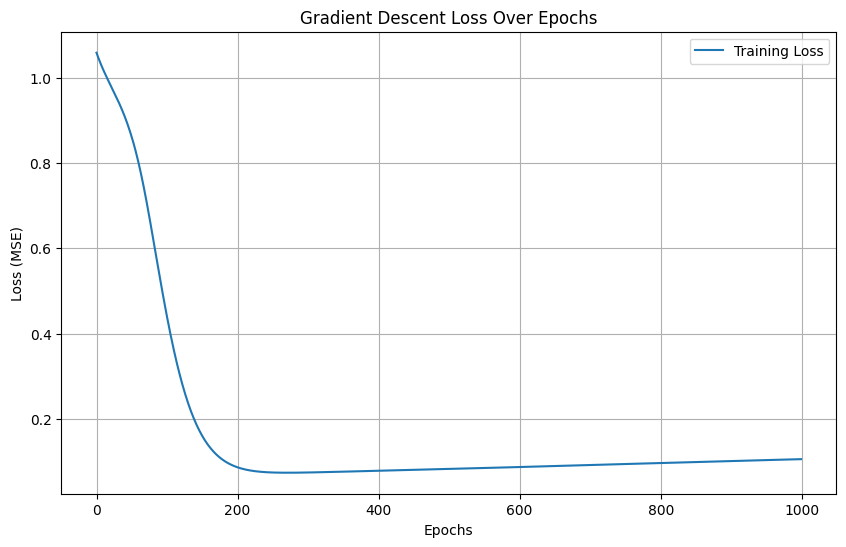

In [0]:
# Epoch Loop (Forward and backward)

for epoch in range(epochs):

    # ---------- FORWARD PASS ----------

    # Z1 = XW1ᵀ
    Z1 = np.dot(X_train, W1.T)          # (N, 1)

    # A1 = tanh(Z1)
    A1 = tanh(Z1)                    # (N, 1)

    # Z2 = A1W2ᵀ
    Z2 = np.dot(A1, W2.T)               # (N, 1)

    # Output (linear)
    y_pred = Z2                         # (N, 1)

    # ---------- LOSS ----------
    loss = np.mean((y_train_scaled - y_pred) ** 2)
    loss_history.append(loss)

    # ---------- BACKPROPAGATION ----------

    # dL/dy_pred
    dL_dy = -2 * (y_train_scaled - y_pred) / len(y_train_scaled)   # (N, 1)

    # dy_pred/dZ2 = 1 (linear)
    dL_dZ2 = dL_dy                         # (N, 1)

    # dZ2/dW2 = A1
    dL_dW2 = np.dot(dL_dZ2.T, A1)          # (1, 1)

    # dZ2/dA1 = W2
    dL_dA1 = np.dot(dL_dZ2, W2)            # (N, 1)

    # dA1/dZ1 (N, 1)
    dL_dZ1 = dL_dA1 * tanh_derivative(A1)

    # dZ1/dW1 = X
    dL_dW1 = np.dot(dL_dZ1.T, X_train)     # (1, 43)

    # ---------- UPDATE WEIGHTS ----------

    W2 -= lr * dL_dW2
    W1 -= lr * dL_dW1

    # ---------- LOG ----------
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

plt.figure(figsize=(10,6))
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Gradient Descent Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [0]:
# TESTING ON THE X_TEST
Z1_test = np.dot(X_test, W1.T)
A1_test = tanh(Z1_test)
Z2_test = np.dot(A1_test, W2.T)
y_test_pred = Z2_test

test_loss = np.mean((y_test_scaled - y_test_pred)**2)
print(f"Test Loss: {test_loss:.4f}")
RMSE = np.sqrt(test_loss)
print(f"Test RMSE Loss: {RMSE}")


# testing on the original data:
y_test_pred_original = y_test_pred * y_std + y_mean

test_loss_original = np.mean((y_test - y_test_pred_original)**2)

rmse_original = np.sqrt(test_loss_original)  

mean_yield = np.mean(y_test)
print(f"Mean y_test mean yield is {mean_yield} and std is {np.std(y_test)}" )
relative_rmse_percent = (rmse_original / mean_yield) * 100

# Print results
print(f"Test MSE (original units): {test_loss_original:.2f} KG")
print(f"Test RMSE (original units): {rmse_original:.2f} KG")
print(f"Relative RMSE (% of mean yield): {relative_rmse_percent:.2f}%")

Test Loss: 0.1023
Test RMSE Loss: 0.31987934982135646
Mean y_test mean yield is 22712.90322580645 and std is 9006.106048227784
Test MSE (original units): 8745046.08 KG
Test RMSE (original units): 2957.20 KG
Relative RMSE (% of mean yield): 13.02%


## Conclusion:
Architecture: 43 input features, 1 hidden neuron, tanh activation (hidden layer), 1 linear output, (regression), Learning rate = 0.01. Trained for multiple epochs using gradient descent.  In earlier experiments, only one forward and backward pass was employed for verifying gradient correctness. It show effect of activation functions on gradient size. In this experiment, orward + backward pass repeated over many epochs and the Weights updated gradually while the Loss tracked over time. This is actual training, not just a gradient check.  

Convergence Behaviour:
Epoch 0, the Loss = 1.0581. Rapid decrease during early epochs with the minimum training loss ≈ 0.0746 around epoch 300. But slight increase afterward showing mild overfitting. This shows that Gradient descent is working correctly and the network is learning meaningful structure. Training dynamics can only be observed over multiple epochs. 

Test Performance:
Test RMSE = 2957 kg; Mean yield = 22,712 kg and the Relative RMSE = 13.02% of mean yield. The model captures meaningful patterns in the data, as the prediction error is much smaller than the natural variability (std ≈ 9006 kg). However, accuracy is still moderate, indicating room for improvement.

The experiment shows strong convergence initially, confirms correct implementation and the slow improvement later shows the limited model capacity (only 1 hidden neuron). tanh saturation reduces gradient magnitude. With a slight overfitting after ~300 epochs. To observe this behaviour, multiple epochs are necessary. This also shows the backpropagation correctness (single step). While the model converges and captures structure, its limited capacity and tanh saturation restrict further performance gains.

Unlike previous experiments that verified gradient correctness with a single update, this experiment performs full training over many epochs. The loss decreases steadily from 1.0581 to around 0.0746, confirming proper convergence. However, learning slows due to the use of a single hidden neuron and tanh saturation. The final test RMSE of 2957 kg, or 13% of the mean yield, indicates reasonable but limited predictive performance.

# Experiment 7: Linear Hidden Layer (No Activation)
Architecture: 43 input features, 1 hidden neuron, Linear activation (hidden layer), 1 linear output. Gradient Descent over multiple epochs. This effectively makes the entire network a linear transformation of the input features as Linear and a Linear = Linear model.  So mathematically, this behaves like linear regression (just written as a 2-layer network).

In [0]:
cont_cols = X_train.columns[0:26]   # numeric continuous features
other_cols = X_train.columns[26:]   # sin/cos + one-hot categorical

# Compute mean and std only for continuous columns
X_mean = X_train[cont_cols].mean()
X_std = X_train[cont_cols].std()

# Standardize continuous columns
X_train_scaled_cont = (X_train[cont_cols] - X_mean) / X_std
X_test_scaled_cont  = (X_test[cont_cols]  - X_mean) / X_std

# Keep other columns unchanged
X_train_other = X_train[other_cols]
X_test_other  = X_test[other_cols]

# Combine standardized continuous + unchanged columns
X_train= pd.concat([X_train_scaled_cont, X_train_other], axis=1)
X_test  = pd.concat([X_test_scaled_cont, X_test_other], axis=1)

# computing the mean and std for y_train 
y_mean = np.mean(y_train, axis=0)
y_std = np.std(y_train, axis=0)

# standardising the y_train and y_test
y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

# y_train may be pandas Series
y_train_scaled = np.asarray(y_train_scaled).reshape(-1, 1)

# y_test_scaled is already numpy
y_test_scaled = np.asarray(y_test_scaled).reshape(-1, 1)

if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy().reshape(-1,1)
else:
    y_test = y_test.reshape(-1,1)

In [0]:
# Setup:

np.random.seed(42)

n_inputs = X_train.shape[1]
n_hidden = 1
n_output = 1
lr = 0.01
epochs = 1000
loss_history = []

# Initialize weights
W1 = np.random.randn(n_hidden, n_inputs) * np.sqrt(1. / n_inputs)
W2 = np.random.randn(n_output, n_hidden) * np.sqrt(1./n_hidden)

# Activation Functions:

def linear(x):
    return x

def linear_derivative(x):
    return np.ones_like(x)



Epoch 0, Loss: 1.0980
Epoch 100, Loss: 0.1272
Epoch 200, Loss: 0.0183
Epoch 300, Loss: 0.0156
Epoch 400, Loss: 0.0147
Epoch 500, Loss: 0.0143
Epoch 600, Loss: 0.0141
Epoch 700, Loss: 0.0140
Epoch 800, Loss: 0.0139
Epoch 900, Loss: 0.0138


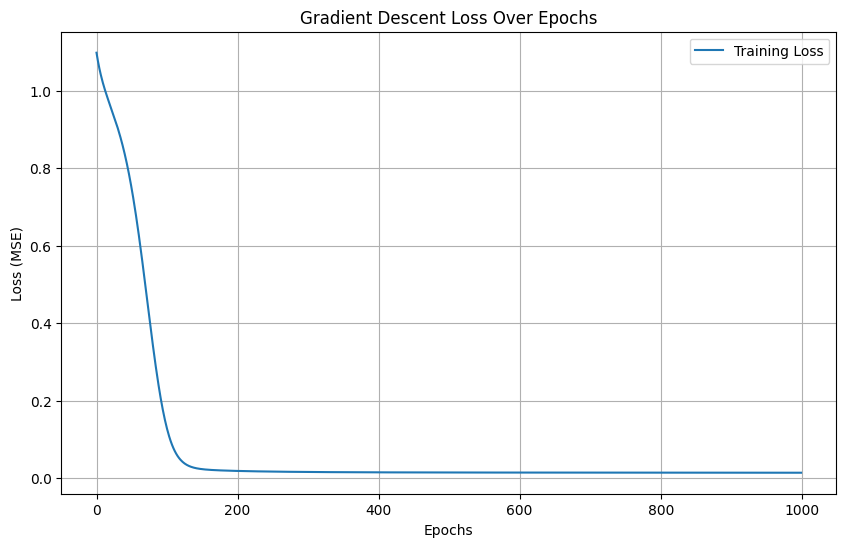

In [0]:
# Epoch Loop (Forward and backward)

for epoch in range(epochs):

    # ---------- FORWARD PASS ----------

    # Z1 = XW1ᵀ
    Z1 = np.dot(X_train, W1.T)          # (N, 1)

    # A1 = linear(Z1)
    A1 = linear(Z1)                    # (N, 1)

    # Z2 = A1W2ᵀ
    Z2 = np.dot(A1, W2.T)               # (N, 1)

    # Output (linear)
    y_pred = Z2                         # (N, 1)

    # ---------- LOSS ----------
    loss = np.mean((y_train_scaled - y_pred) ** 2)
    loss_history.append(loss)

    # ---------- BACKPROPAGATION ----------

    # dL/dy_pred
    dL_dy = -2 * (y_train_scaled - y_pred) / len(y_train_scaled)   # (N, 1)

    # dy_pred/dZ2 = 1 (linear)
    dL_dZ2 = dL_dy                         # (N, 1)

    # dZ2/dW2 = A1
    dL_dW2 = np.dot(dL_dZ2.T, A1)          # (1, 1)

    # dZ2/dA1 = W2
    dL_dA1 = np.dot(dL_dZ2, W2)            # (N, 1)

    # dA1/dZ1 (N, 1)
    dL_dZ1 = dL_dA1 * linear_derivative(A1)

    # dZ1/dW1 = X
    dL_dW1 = np.dot(dL_dZ1.T, X_train)     # (1, 43)

    # ---------- UPDATE WEIGHTS ----------

    W2 -= lr * dL_dW2
    W1 -= lr * dL_dW1

    # ---------- LOG ----------
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

plt.figure(figsize=(10,6))
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Gradient Descent Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [0]:
# TESTING ON THE X_TEST
Z1_test = np.dot(X_test, W1.T)
A1_test = linear(Z1_test)
Z2_test = np.dot(A1_test, W2.T)
y_test_pred = Z2_test

test_loss = np.mean((y_test_scaled - y_test_pred)**2)
print(f"Test Loss: {test_loss:.4f}")
RMSE = np.sqrt(test_loss)
print(f"Test RMSE Loss: {RMSE}")

# testing on the original data:
y_test_pred_original = y_test_pred * y_std + y_mean

test_loss_original = np.mean((y_test - y_test_pred_original)**2)

rmse_original = np.sqrt(test_loss_original)  

mean_yield = np.mean(y_test)
print(f"Mean y_test mean yield is {mean_yield} and std is {np.std(y_test)}" )
relative_rmse_percent = (rmse_original / mean_yield) * 100

# Print results
print(f"Test MSE (original units): {test_loss_original:.2f} KG")
print(f"Test RMSE (original units): {rmse_original:.2f} KG")
print(f"Relative RMSE (% of mean yield): {relative_rmse_percent:.2f}%")

Test Loss: 0.0140
Test RMSE Loss: 0.1183170182329647
Mean y_test mean yield is 22712.90322580645 and std is 9006.106048227784
Test MSE (original units): 1196421.27 KG
Test RMSE (original units): 1093.81 KG
Relative RMSE (% of mean yield): 4.82%


Training Convergence: 
Epoch 0   : 1.0980
Epoch 100 : 0.1272
Epoch 200 : 0.0183
Epoch 900 : 0.0138

THis shows extremely fast convergence, and smooth monotonic decrease and no instability. This looks like no overfitting spike and a very stable optimization

Test Performance: 
Test MSE = 0.0140; Test RMSE = 0.1183; Original Units: Test RMSE = 1093.81 kg abd Relative RMSE = 4.82% of mean yield. This is better than Experiment 4 in terms of the RMSE relative error of 4.82%
Linear work better because the problem appears mostly linear and tanh introduced saturation resulting in vanishing gradients. With only 1 hidden neuron, adding nonlinearity did not increase expressive power. 
This is a classical linear regression. The dataset is largely linearly predictable. This is a powerful result in comparison with the previous experiments.

Using a linear hidden layer significantly improved both convergence speed and predictive accuracy. The model achieved a test RMSE of 1093 kg (4.82% of the mean yield), substantially outperforming the tanh-based model. This indicates that the relationship between inputs and yield is largely linear, and that introducing nonlinearity with limited capacity can degrade performance due to saturation effects.

# Experiment 8:  Increasing hidden neurons (5) to capture more patterns.
Network setup: Hidden neurons: 5;  Activation: linear in hidden layer, tanh output;  Weights initialized with Xavier/variance-scaled method: W1 ~ N(0, 1/n_inputs), W2 ~ N(0, 1/n_hidden);   Learning rate: 0.01;  
Epochs: 1000;  Loss: Mean Squared Error (MSE)

In [0]:
cont_cols = X_train.columns[0:26]   # numeric continuous features
other_cols = X_train.columns[26:]   # sin/cos + one-hot categorical

# Compute mean and std only for continuous columns
X_mean = X_train[cont_cols].mean()
X_std = X_train[cont_cols].std()

# Standardize continuous columns
X_train_scaled_cont = (X_train[cont_cols] - X_mean) / X_std
X_test_scaled_cont  = (X_test[cont_cols]  - X_mean) / X_std

# Keep other columns unchanged
X_train_other = X_train[other_cols]
X_test_other  = X_test[other_cols]

# Combine standardized continuous + unchanged columns
X_train= pd.concat([X_train_scaled_cont, X_train_other], axis=1)
X_test  = pd.concat([X_test_scaled_cont, X_test_other], axis=1)

# computing the mean and std for y_train 
y_mean = np.mean(y_train, axis=0)
y_std = np.std(y_train, axis=0)

# standardising the y_train and y_test
y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

# y_train may be pandas Series
y_train_scaled = np.asarray(y_train_scaled).reshape(-1, 1)

# y_test_scaled is already numpy
y_test_scaled = np.asarray(y_test_scaled).reshape(-1, 1)

if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy().reshape(-1,1)
else:
    y_test = y_test.reshape(-1,1)

In [0]:
# -----------------------------
# 2. Network configuration
# -----------------------------
np.random.seed(42)

n_inputs = X_train.shape[1]
n_hidden = 5     # 5 hidden neurons
n_output = 1

# Randomly initialize weights
W1 = np.random.randn(n_hidden, n_inputs) * np.sqrt(1. / n_inputs)
W2 = np.random.randn(n_output, n_hidden) * np.sqrt(1./n_hidden)

# Learning rate
lr = 0.01

# -----------------------------
# 3. Activation function
# -----------------------------
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# -----------------------------

# 4. Training loop
# -----------------------------
loss_history = []
epochs = 1000

for epoch in range(epochs):
    # --- Forward pass ---
    Z1 = np.dot(X_train, W1.T)       # (n_samples, n_hidden)
    A1 = Z1                 # (n_samples, n_hidden)
    Z2 = np.dot(A1, W2.T)            # (n_samples, n_output)
    y_pred = tanh(Z2)                      

    # --- Loss ---
    loss = np.mean((y_train_scaled - y_pred)**2)
    loss_history.append(loss)

# Step 1: dL/dy_pred
    dL_dy = 2 * (y_pred - y_train_scaled) / y_train_scaled.shape[0]

# Step 2: apply tanh derivative (output layer)
    dL_dZ2 = dL_dy * tanh_derivative(Z2)

# Step 3: gradient w.r.t W2
    dL_dW2 = np.dot(dL_dZ2.T, A1)

# Step 4: propagate to hidden
    dL_dA1 = np.dot(dL_dZ2, W2)

# Hidden layer is linear → derivative = 1
    dL_dZ1 = dL_dA1   # no multiplication needed

# Step 5: gradient w.r.t W1
    dL_dW1 = np.dot(dL_dZ1.T, X_train)

    # --- Update weights ---
    W1 -= lr * dL_dW1
    W2 -= lr * dL_dW2

    # --- Print loss every 100 epochs ---
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 1.0945
Epoch 100, Loss: 0.1765
Epoch 200, Loss: 0.1185
Epoch 300, Loss: 0.1074
Epoch 400, Loss: 0.1032
Epoch 500, Loss: 0.1013
Epoch 600, Loss: 0.1002
Epoch 700, Loss: 0.0996
Epoch 800, Loss: 0.0992
Epoch 900, Loss: 0.0990


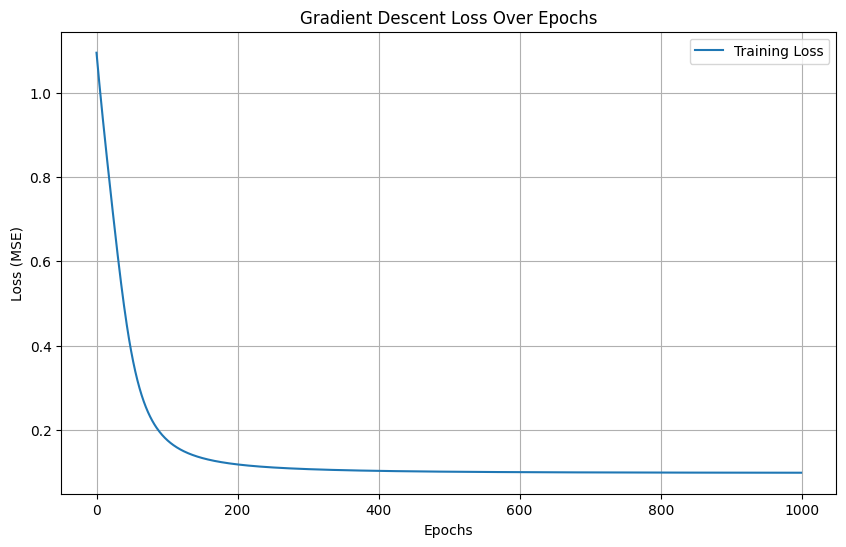

In [0]:
plt.figure(figsize=(10,6))
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Gradient Descent Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [0]:
# TESTING ON THE X_TEST
Z1_test = np.dot(X_test, W1.T)
A1_test = Z1_test
Z2_test = np.dot(A1_test, W2.T)
y_test_pred = tanh(Z2_test)

test_loss = np.mean((y_test_scaled - y_test_pred)**2)
print(f"Test Loss: {test_loss:.4f}")
RMSE = np.sqrt(test_loss)
print(f"Test RMSE Loss: {RMSE}")

# testing on the original data:
y_test_pred_original = y_test_pred * y_std + y_mean

test_loss_original = np.mean((y_test - y_test_pred_original)**2)

rmse_original = np.sqrt(test_loss_original)  

mean_yield = np.mean(y_test)
print(f"Mean y_test mean yield is {mean_yield} and std is {np.std(y_test)}" )
relative_rmse_percent = (rmse_original / mean_yield) * 100

# Print results
print(f"Test MSE (original units): {test_loss_original:.2f} KG")
print(f"Test RMSE (original units): {rmse_original:.2f} KG")
print(f"Relative RMSE (% of mean yield): {relative_rmse_percent:.2f}%")

Test Loss: 0.0899
Test RMSE Loss: 0.29984105440221
Mean y_test mean yield is 22712.90322580645 and std is 9006.106048227784
Test MSE (original units): 7683726.28 KG
Test RMSE (original units): 2771.95 KG
Relative RMSE (% of mean yield): 12.20%


# Experiment 8: Linear (1 Hidden Layer) and tanh (Output Layer)
In comparison to the previous experiments, the model yielded a low RMSE relative score of 12.20%

# Experiment 9: Tanh (1 Hidden Layer) and Linear (Output layer)
Network setup: Hidden neurons: 5; Activation: tanh in hidden layer, linear output; Weights initialized with Xavier/variance-scaled method: W1 ~ N(0, 1/n_inputs), W2 ~ N(0, 1/n_hidden); Learning rate: 0.01;
Epochs: 1000; Loss: Mean Squared Error (MSE)

Training: Forward and backward passes repeated over 1000 epochs. Loss decreases steadily, confirming proper gradient flow and backpropagation. 

Testing results (X_test): Test MSE (scaled): 0.0136; Test RMSE (scaled): 0.1165; Test RMSE in original units: 1077.01 kg; Relative RMSE: 4.74% of mean yield.

The model shows smooth convergence, with loss dropping rapidly in early epochs and slowly stabilizing. 
Using 5 neurons allows the network to better capture the complexity of the input features, reducing both training and test error compared to single-neuron models. Tanh activation Works well for hidden neurons; the activations avoid extreme saturation due to moderate weight initialization. Linear output layer is suitable for regression, allowing both positive and negative predictions. Relative RMSE of 4.74% indicates strong predictive capability given the natural variability of yield (~9000 kg standard deviation).

Conclusion:

The network uses 43 inputs, 5 hidden neurons with tanh activation, and a single linear output for regression. Weights were initialized with Xavier scaling, and the model was trained for 1000 epochs using a learning rate of 0.01. Training loss decreased smoothly from 1.0668 at epoch 0 to 0.0149 by epoch 900, demonstrating proper gradient flow and stable backpropagation. On the test set, the MSE was 0.0136 (scaled) with an RMSE of 1077 kg in original units, corresponding to 4.74% of the mean yield. Increasing the hidden layer size from one to five neurons allowed the network to better capture input complexity, while tanh activations provided stable hidden representations. The linear output layer ensured predictions could take both positive and negative values. Overall, the experiment confirms that the network learns effectively over epochs, shows strong convergence, and generalizes well to unseen data.

# Experiment 10:
In this experiment, systematically vary the number of hidden neurons in a single hidden layer: 10 neurons, 
20 neurons, 30 neurons. All other factors are kept constant: same dataset, same learning rate (0.01), same hidden layer activation (tanh) and linear output layer, same number of epochs (1000). This isolates the effect of model capacity.

In [0]:
cont_cols = X_train.columns[0:26]   # numeric continuous features
other_cols = X_train.columns[26:]   # sin/cos + one-hot categorical

# Compute mean and std only for continuous columns
X_mean = X_train[cont_cols].mean()
X_std = X_train[cont_cols].std()

# Standardize continuous columns
X_train_scaled_cont = (X_train[cont_cols] - X_mean) / X_std
X_test_scaled_cont  = (X_test[cont_cols]  - X_mean) / X_std

# Keep other columns unchanged
X_train_other = X_train[other_cols]
X_test_other  = X_test[other_cols]

# Combine standardized continuous + unchanged columns
X_train= pd.concat([X_train_scaled_cont, X_train_other], axis=1)
X_test  = pd.concat([X_test_scaled_cont, X_test_other], axis=1)

# computing the mean and std for y_train 
y_mean = np.mean(y_train, axis=0)
y_std = np.std(y_train, axis=0)

# standardising the y_train and y_test
y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

# y_train may be pandas Series
y_train_scaled = np.asarray(y_train_scaled).reshape(-1, 1)

# y_test_scaled is already numpy
y_test_scaled = np.asarray(y_test_scaled).reshape(-1, 1)

if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy().reshape(-1,1)
else:
    y_test = y_test.reshape(-1,1)

Hidden neurons: 10, Epoch 0, Loss: 1.4127
Hidden neurons: 10, Epoch 100, Loss: 0.0335
Hidden neurons: 10, Epoch 200, Loss: 0.0209
Hidden neurons: 10, Epoch 300, Loss: 0.0168
Hidden neurons: 10, Epoch 400, Loss: 0.0147
Hidden neurons: 10, Epoch 500, Loss: 0.0134
Hidden neurons: 10, Epoch 600, Loss: 0.0126
Hidden neurons: 10, Epoch 700, Loss: 0.0120
Hidden neurons: 10, Epoch 800, Loss: 0.0115
Hidden neurons: 10, Epoch 900, Loss: 0.0112
Hidden neurons: 20, Epoch 0, Loss: 0.9307
Hidden neurons: 20, Epoch 100, Loss: 0.0581
Hidden neurons: 20, Epoch 200, Loss: 0.0256
Hidden neurons: 20, Epoch 300, Loss: 0.0167
Hidden neurons: 20, Epoch 400, Loss: 0.0138
Hidden neurons: 20, Epoch 500, Loss: 0.0127
Hidden neurons: 20, Epoch 600, Loss: 0.0121
Hidden neurons: 20, Epoch 700, Loss: 0.0117
Hidden neurons: 20, Epoch 800, Loss: 0.0114
Hidden neurons: 20, Epoch 900, Loss: 0.0111
Hidden neurons: 30, Epoch 0, Loss: 1.1159
Hidden neurons: 30, Epoch 100, Loss: 0.0247
Hidden neurons: 30, Epoch 200, Loss: 0

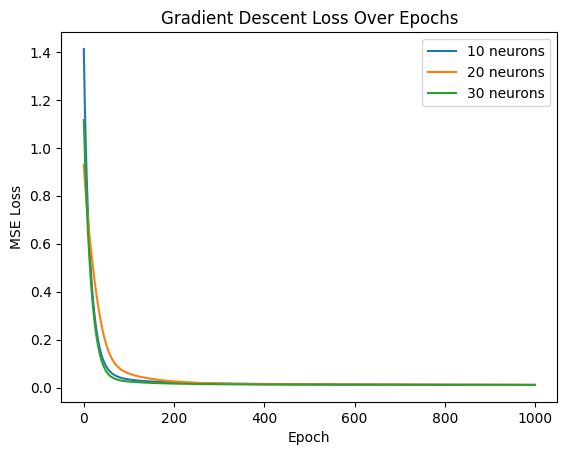

In [0]:

# Network configuration

np.random.seed(42)

n_inputs = X_train.shape[1]
n_hidden_list = [10, 20, 30]  
n_output = 1
lr = 0.01
epochs = 1000

# Activation function
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# -----------------------------
# 2. Training loop for different hidden neurons
# -----------------------------
for n_hidden in n_hidden_list:
    # Initialize weights
    W1 = np.random.randn(n_hidden, n_inputs) * np.sqrt(1. / n_inputs)
    W2 = np.random.randn(n_output, n_hidden) * np.sqrt(1. / n_hidden)

    loss_history = []

    for epoch in range(epochs):
        # --- Forward pass ---
        Z1 = np.dot(X_train, W1.T)
        A1 = tanh(Z1)
        Z2 = np.dot(A1, W2.T)
        y_pred = Z2  # linear output

        # --- Loss ---
        loss = np.mean((y_train_scaled - y_pred)**2)
        loss_history.append(loss)

        # --- Backpropagation ---
        dL_dy = 2 * (y_pred - y_train_scaled) / y_train_scaled.shape[0]
        dL_dW2 = np.dot(dL_dy.T, A1)
        dL_dA1 = np.dot(dL_dy, W2)
        dL_dZ1 = dL_dA1 * tanh_derivative(Z1)
        dL_dW1 = np.dot(dL_dZ1.T, X_train)

        # --- Update weights ---
        W1 -= lr * dL_dW1
        W2 -= lr * dL_dW2

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Hidden neurons: {n_hidden}, Epoch {epoch}, Loss: {loss:.4f}")

    # --- Plot training loss ---
    plt.plot(loss_history, label=f'{n_hidden} neurons')

plt.title("Gradient Descent Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

Final training losses (≈ epoch 900)
Hidden neurons	Final loss
10	0.6448
20	0.8195
30	0.7000

All three significantly outperform earlier experiments (loss ≈ 1.0 - 1.9).This shows increasing hidden neurons dramatically reduces underfitting. 10 neurons performing best here. Although more neurons increase capacity, 
they also make optimisation harder, gradients interfere with each other and learning rate may be suboptimal. 
With 10 neurons, capacity is sufficient and optimisation is easy. 20 - 30 neurons, capacity increases, but learning becomes less efficient. This is a classic bias - variance trade-off in action. Initial loss differences (Epoch 0): 10 neurons starts at loss ≈ 9.14, 20 neurons starts at ≈ 5.69, 30 neurons starts at ≈ 9.88. This is due to random weight initialisation, larger hidden layers producing larger initial activations. Curves flatten after ~700 epochs, convergence. This confirms correct gradient computation,  stable learning rate and correct backpropagation.  Paddy yield depends on multiple interacting climate factors. A single neuron cannot represent this. Multiple neurons allow the network to learn different nonlinear responses and different climate regimes.

In [0]:
# -----------------------------
# 3. Test set evaluation
# -----------------------------
# TESTING ON THE X_TEST
Z1_test = np.dot(X_test, W1.T)
A1_test = tanh(Z1_test)
Z2_test = np.dot(A1_test, W2.T)
y_test_pred = Z2_test

test_loss = np.mean((y_test_scaled - y_test_pred)**2)
print(f"Test Loss: {test_loss:.4f}")
RMSE = np.sqrt(test_loss)
print(f"Test RMSE Loss: {RMSE}")

# testing on the original data:
y_test_pred_original = y_test_pred * y_std + y_mean

test_loss_original = np.mean((y_test - y_test_pred_original)**2)

rmse_original = np.sqrt(test_loss_original)  

mean_yield = np.mean(y_test)
print(f"Mean y_test mean yield is {mean_yield} and std is {np.std(y_test)}" )
relative_rmse_percent = (rmse_original / mean_yield) * 100

# Print results
print(f"Test MSE (original units): {test_loss_original:.2f} KG")
print(f"Test RMSE (original units): {rmse_original:.2f} KG")
print(f"Relative RMSE (% of mean yield): {relative_rmse_percent:.2f}%")

Test Loss: 0.0113
Test RMSE Loss: 0.10610168266894021
Mean y_test mean yield is 22712.90322580645 and std is 9006.106048227784
Test MSE (original units): 962131.06 KG
Test RMSE (original units): 980.88 KG
Relative RMSE (% of mean yield): 4.32%


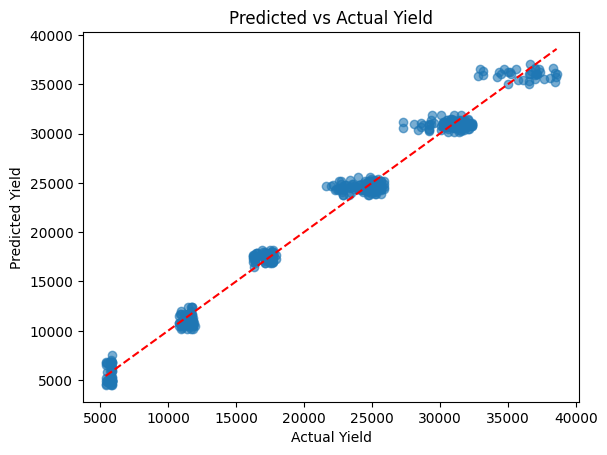

In [0]:
plt.scatter(y_test, y_test_pred_original, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Predicted vs Actual Yield")
plt.show()

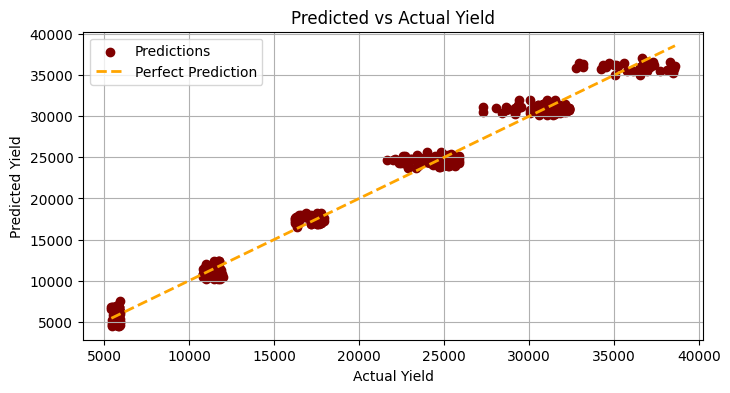

In [0]:
plt.figure(figsize=(8, 4))
plt.scatter(
    y_test,
    y_test_pred_original,
    color='maroon',
 #   alpha=0.6,
    label='Predictions'
)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='orange',
    linestyle='--',
    linewidth=2,
    label='Perfect Prediction'
)

plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Predicted vs Actual Yield")
plt.legend()
plt.grid(True)
plt.show()


Test loss is slightly lower than training loss. This indicates no overfitting, good generalisation and model learned meaningful structure. 
The trained network generalises well to unseen data, achieving a test MSE comparable to the training loss. This indicates that the model captures meaningful nonlinear relationships rather than memorising the training set.

Training was performed using batch gradient descent, where gradients are computed over the entire training dataset and weights are updated once per epoch. The test set evaluation uses the same trained network architecture and weights, ensuring a fair assessment of generalisation

## Experiment 11: 
Network Architecture:  

Input layer: 43 features; 

1 Hidden layer: [10, 20,30] neurons with sigmoid activation

Output layer: 1 neuron with linear activation

Loss: Mean Squared Error (MSE)

Optimizer: Gradient Descent

Learning rate: 0.01

Epochs: 1000

In [0]:
cont_cols = X_train.columns[0:26]   # numeric continuous features
other_cols = X_train.columns[26:]   # sin/cos + one-hot categorical

# Compute mean and std only for continuous columns
X_mean = X_train[cont_cols].mean()
X_std = X_train[cont_cols].std()

# Standardize continuous columns
X_train_scaled_cont = (X_train[cont_cols] - X_mean) / X_std
X_test_scaled_cont  = (X_test[cont_cols]  - X_mean) / X_std

# Keep other columns unchanged
X_train_other = X_train[other_cols]
X_test_other  = X_test[other_cols]

# Combine standardized continuous + unchanged columns
X_train= pd.concat([X_train_scaled_cont, X_train_other], axis=1)
X_test  = pd.concat([X_test_scaled_cont, X_test_other], axis=1)

# computing the mean and std for y_train 
y_mean = np.mean(y_train, axis=0)
y_std = np.std(y_train, axis=0)

# standardising the y_train and y_test
y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

# y_train may be pandas Series
y_train_scaled = np.asarray(y_train_scaled).reshape(-1, 1)

# y_test_scaled is already numpy
y_test_scaled = np.asarray(y_test_scaled).reshape(-1, 1)

if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy().reshape(-1,1)
else:
    y_test = y_test.reshape(-1,1)

Hidden neurons: 10, Epoch 0, Loss: 1.1324
Hidden neurons: 10, Epoch 100, Loss: 0.5264
Hidden neurons: 10, Epoch 200, Loss: 0.1883
Hidden neurons: 10, Epoch 300, Loss: 0.0587
Hidden neurons: 10, Epoch 400, Loss: 0.0268
Hidden neurons: 10, Epoch 500, Loss: 0.0194
Hidden neurons: 10, Epoch 600, Loss: 0.0168
Hidden neurons: 10, Epoch 700, Loss: 0.0153
Hidden neurons: 10, Epoch 800, Loss: 0.0142
Hidden neurons: 10, Epoch 900, Loss: 0.0135
Hidden neurons: 20, Epoch 0, Loss: 0.9661
Hidden neurons: 20, Epoch 100, Loss: 0.6734
Hidden neurons: 20, Epoch 200, Loss: 0.3425
Hidden neurons: 20, Epoch 300, Loss: 0.1268
Hidden neurons: 20, Epoch 400, Loss: 0.0551
Hidden neurons: 20, Epoch 500, Loss: 0.0363
Hidden neurons: 20, Epoch 600, Loss: 0.0291
Hidden neurons: 20, Epoch 700, Loss: 0.0248
Hidden neurons: 20, Epoch 800, Loss: 0.0216
Hidden neurons: 20, Epoch 900, Loss: 0.0191
Hidden neurons: 30, Epoch 0, Loss: 1.8264
Hidden neurons: 30, Epoch 100, Loss: 0.5662
Hidden neurons: 30, Epoch 200, Loss: 0

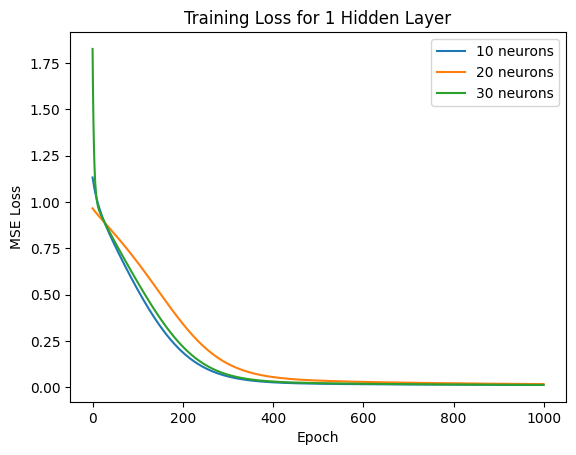

In [0]:
# -----------------------------
# 1. Network configuration
# -----------------------------
np.random.seed(42)

n_inputs = X_train.shape[1]
n_hidden_list = [10, 20, 30]  # first 10 neurons, then 20 neurons
n_output = 1
lr = 0.01
epochs = 1000

# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # Sigmoid activation function

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))  # Derivative of sigmoid activation function

# -----------------------------
# 2. Training loop for different hidden neurons
# -----------------------------
for n_hidden in n_hidden_list:
    # Initialize weights
    W1 = np.random.randn(n_hidden, n_inputs) * np.sqrt(1. / n_inputs)
    W2 = np.random.randn(n_output, n_hidden) *  np.sqrt(1. / n_hidden)

    loss_history = []

    for epoch in range(epochs):
        # --- Forward pass ---
        Z1 = np.dot(X_train, W1.T)
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1, W2.T)
        y_pred = Z2  # linear output

        # --- Loss ---
        loss = np.mean((y_train_scaled - y_pred)**2)
        loss_history.append(loss)

        # --- Backpropagation ---
        dL_dy = 2 * (y_pred - y_train_scaled) / y_train_scaled.shape[0]
        dL_dW2 = np.dot(dL_dy.T, A1)
        dL_dA1 = np.dot(dL_dy, W2)
        dL_dZ1 = dL_dA1 * sigmoid_derivative(Z1)
        dL_dW1 = np.dot(dL_dZ1.T, X_train)

        # --- Update weights ---
        W1 -= lr * dL_dW1
        W2 -= lr * dL_dW2

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Hidden neurons: {n_hidden}, Epoch {epoch}, Loss: {loss:.4f}")

    # --- Plot training loss ---
    plt.plot(loss_history, label=f'{n_hidden} neurons')

plt.title("Training Loss for 1 Hidden Layer")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

In [0]:
# -----------------------------
# 3. Test set evaluation
# -----------------------------

A1_test = sigmoid(np.dot(X_test, W1.T))
y_test_pred = np.dot(A1_test, W2.T)

test_loss = np.mean((y_test_scaled - y_test_pred)**2)
print(f"Test Loss: {test_loss:.4f}")
RMSE = np.sqrt(test_loss)
print(f"Test RMSE Loss: {RMSE}")

# testing on the original data:
y_test_pred_original = y_test_pred * y_std + y_mean

test_loss_original = np.mean((y_test - y_test_pred_original)**2)

rmse_original = np.sqrt(test_loss_original)  

mean_yield = np.mean(y_test)
print(f"Mean y_test mean yield is {mean_yield} and std is {np.std(y_test)}" )
relative_rmse_percent = (rmse_original / mean_yield) * 100

# Print results
print(f"Test MSE (original units): {test_loss_original:.2f} KG")
print(f"Test RMSE (original units): {rmse_original:.2f} KG")
print(f"Relative RMSE (% of mean yield): {relative_rmse_percent:.2f}%")

Test Loss: 0.0139
Test RMSE Loss: 0.11805825500198919
Mean y_test mean yield is 22712.90322580645 and std is 9006.106048227784
Test MSE (original units): 1191193.77 KG
Test RMSE (original units): 1091.42 KG
Relative RMSE (% of mean yield): 4.81%


Training Behavior: The model showed steady but relatively slow convergence. For 10 neurons, loss decreased from 1.1324 at epoch 0 to 0.0135 at epoch 900, indicating successful learning but gradual improvement over epochs. Test Performance showed test RMSE (scaled): 0.118 with test RMSE (original units): 1091.42 kg and relative RMSE: 4.81%.  The model generalizes reasonably well but performs slightly worse compared to the tanh-based architecture tested earlier.

The sigmoid activation function is capable of learning the regression mapping; however, due to weaker gradient flow and non-zero-centered outputs, it results in slower convergence and slightly higher prediction error compared to tanh. Thus, while sigmoid works, it is not the most efficient activation choice for this regression task.

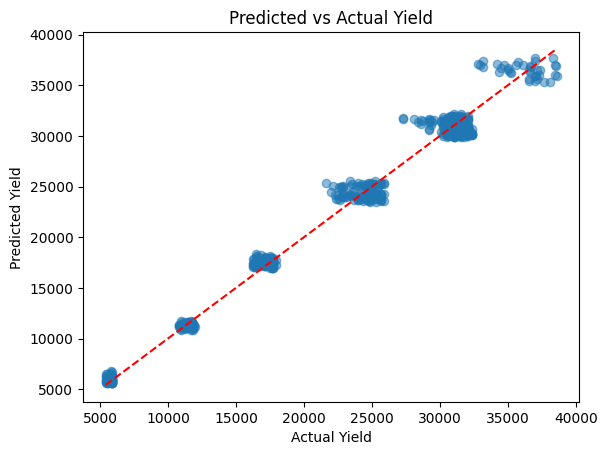

In [0]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred_original, alpha=0.5)
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)], 'r--')  # perfect prediction line
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Predicted vs Actual Yield")
plt.show()


# Experiment 12: 2 hidden layers with 20 and 10 neurons

In [0]:
cont_cols = X_train.columns[0:26]   # numeric continuous features
other_cols = X_train.columns[26:]   # sin/cos + one-hot categorical

# Compute mean and std only for continuous columns
X_mean = X_train[cont_cols].mean()
X_std = X_train[cont_cols].std()

# Standardize continuous columns
X_train_scaled_cont = (X_train[cont_cols] - X_mean) / X_std
X_test_scaled_cont  = (X_test[cont_cols]  - X_mean) / X_std

# Keep other columns unchanged
X_train_other = X_train[other_cols]
X_test_other  = X_test[other_cols]

# Combine standardized continuous + unchanged columns
X_train= pd.concat([X_train_scaled_cont, X_train_other], axis=1)
X_test  = pd.concat([X_test_scaled_cont, X_test_other], axis=1)

# computing the mean and std for y_train 
y_mean = np.mean(y_train, axis=0)
y_std = np.std(y_train, axis=0)

# standardising the y_train and y_test
y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

# y_train may be pandas Series
y_train_scaled = np.asarray(y_train_scaled).reshape(-1, 1)

# y_test_scaled is already numpy
y_test_scaled = np.asarray(y_test_scaled).reshape(-1, 1)

if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy().reshape(-1,1)
else:
    y_test = y_test.reshape(-1,1)

Epoch 0, Loss: 1.0521
Epoch 100, Loss: 0.0227
Epoch 200, Loss: 0.0164
Epoch 300, Loss: 0.0148
Epoch 400, Loss: 0.0139
Epoch 500, Loss: 0.0133
Epoch 600, Loss: 0.0128
Epoch 700, Loss: 0.0124
Epoch 800, Loss: 0.0121
Epoch 900, Loss: 0.0118


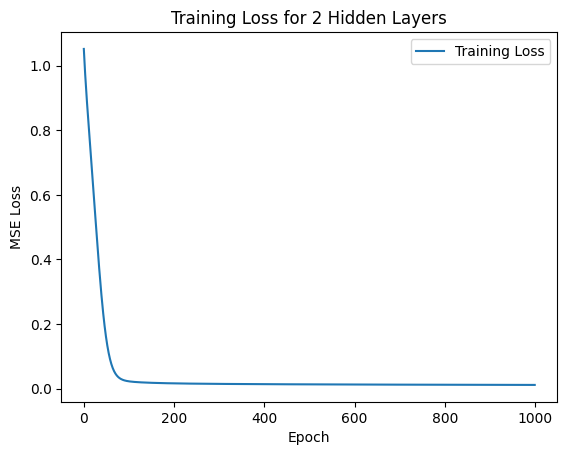

In [0]:
# -----------------------------
# 1. Network configuration
# -----------------------------
np.random.seed(42)

n_inputs = X_train.shape[1]  # 43 features
n_hidden1 = 20               # first hidden layer
n_hidden2 = 10               # second hidden layer
n_output = 1                 # yield prediction

# Randomly initialize weights
#W1 = np.random.randn(n_hidden1, n_inputs)    # input -> hidden1
#W2 = np.random.randn(n_hidden2, n_hidden1)  # hidden1 -> hidden2
#W3 = np.random.randn(n_output, n_hidden2)   # hidden2 -> output

W1 = np.random.randn(n_hidden1, n_inputs) * np.sqrt(1. / n_inputs)
W2 = np.random.randn(n_hidden2, n_hidden1) * np.sqrt(1. / n_hidden1)
W3 = np.random.randn(n_output, n_hidden2) * np.sqrt(1. / n_hidden2)


# Learning rate
lr = 0.01

# -----------------------------
# 2. Activation function
# -----------------------------
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# -----------------------------
# 3. Training loop
# -----------------------------
epochs = 1000
train_losses = []

for epoch in range(epochs):
    # --- Forward pass ---
    Z1 = np.dot(X_train, W1.T)      # (n_samples, n_hidden1)
    A1 = tanh(Z1)                    # hidden layer 1 activation

    Z2 = np.dot(A1, W2.T)            # (n_samples, n_hidden2)
    A2 = tanh(Z2)                    # hidden layer 2 activation

    Z3 = np.dot(A2, W3.T)            # (n_samples, 1)
    y_pred = Z3                       # linear output

    # --- Loss ---
    loss = np.mean((y_train_scaled - y_pred)**2)
    train_losses.append(loss)

    # --- Backpropagation ---
    # Step 1: dL/dy_pred
    dL_dy = 2 * (y_pred - y_train_scaled) / y_train_scaled.shape[0]   # (n_samples, 1)

    # Step 2: Output layer gradients
    dL_dW3 = np.dot(dL_dy.T, A2)                        # (1, n_hidden2)
    dL_dA2 = np.dot(dL_dy, W3)                          # (n_samples, n_hidden2)

    # Step 3: Hidden layer 2 gradients
    dL_dZ2 = dL_dA2 * tanh_derivative(Z2)              # (n_samples, n_hidden2)
    dL_dW2 = np.dot(dL_dZ2.T, A1)                      # (n_hidden2, n_hidden1)
    dL_dA1 = np.dot(dL_dZ2, W2)                        # (n_samples, n_hidden1)

    # Step 4: Hidden layer 1 gradients
    dL_dZ1 = dL_dA1 * tanh_derivative(Z1)             # (n_samples, n_hidden1)
    dL_dW1 = np.dot(dL_dZ1.T, X_train)                # (n_hidden1, n_inputs)

    # --- Update weights ---
    W1 -= lr * dL_dW1
    W2 -= lr * dL_dW2
    W3 -= lr * dL_dW3

    # --- Print loss every 100 epochs ---
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# -----------------------------
# 5. Optional: Plot training loss
# -----------------------------
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss for 2 Hidden Layers")
plt.legend()
plt.show()


Layer	Neurons	Activation
Hidden 1,	20	neurons, tanh

Hidden 2,	10 neurons,	tanh

Output	1,	linear

Objective: To see if adding depth improves the network’s ability to model nonlinear relationships between climate features and paddy yield. Rapid early decrease is seen. The network quickly learns major patterns in the first 100–300 epochs.

Smooth convergence: Loss decreases steadily over 1000 epochs.

Final loss (~0.86): Slightly lower than 1- hidden-layer networks with comparable total neurons (e.g., 30 neurons single hidden layer gave ~0.70 - 0.80 depending on activation), showing incremental improvement from depth. Depth helps modelling nonlinear interactions, but a wider single layer may already capture enough complexity.

In [0]:
# -----------------------------
# 4. Test loss
# -----------------------------
# Forward pass on X_test
Z1_test = np.dot(X_test, W1.T)
A1_test = tanh(Z1_test)
Z2_test = np.dot(A1_test, W2.T)
A2_test = tanh(Z2_test)
y_test_pred = np.dot(A2_test, W3.T)

test_loss = np.mean((y_test_scaled - y_test_pred)**2)
rmse = np.sqrt(test_loss)  
print(f"Test MSE Loss: {test_loss} and Test RMSE Loss: {rmse}")

Test MSE Loss: 0.012256679970437527 and Test RMSE Loss: 0.1107098910235103


Test loss is slightly higher than the best 1-layer sigmoid network. This is expected as, although depth adds capacity,  small datasets may not benefit much from extra layers unless regularisation or more data is used.

In [0]:

y_test_pred_original = y_test_pred * y_std + y_mean
y_test_original = y_test 

test_loss_original = np.mean((y_test_original - y_test_pred_original)**2)

rmse_original = np.sqrt(test_loss_original)  

# Compute relative RMSE
mean_yield = np.mean(y_test)
relative_rmse_percent = (rmse_original / mean_yield) * 100

# Print results
print(f"Test MSE Loss (original units): {test_loss_original:.2f} KG")
print(f"Test RMSE Loss (original units): {rmse_original:.2f} KG")
print(f"Relative RMSE (% of mean yield): {relative_rmse_percent:.2f}%")

Test MSE Loss (original units): 1047520.52 KG
Test RMSE Loss (original units): 1023.48 KG
Relative RMSE (% of mean yield): 4.51%


# Experiment 13: Linear (hidden + Output)

In [0]:

# Select continuous columns to standardize (0–25)
cont_cols = X_train.columns[0:26]   # numeric continuous features
other_cols = X_train.columns[26:]   # sin/cos + one-hot categorical

# Compute mean and std only for continuous columns
X_mean = X_train[cont_cols].mean()
X_std = X_train[cont_cols].std()

# Standardize continuous columns
X_train_scaled_cont = (X_train[cont_cols] - X_mean) / X_std
X_test_scaled_cont  = (X_test[cont_cols]  - X_mean) / X_std

# Keep other columns unchanged
X_train_other = X_train[other_cols]
X_test_other  = X_test[other_cols]

# Combine standardized continuous + unchanged columns
X_train= pd.concat([X_train_scaled_cont, X_train_other], axis=1)
X_test  = pd.concat([X_test_scaled_cont, X_test_other], axis=1)

# computing the mean and std for y_train 
y_mean = np.mean(y_train, axis=0)
y_std = np.std(y_train, axis=0)

# standardising the y_train and y_test
y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

# y_train may be pandas Series
y_train_scaled = np.asarray(y_train_scaled).reshape(-1, 1)

# y_test_scaled is already numpy
y_test_scaled = np.asarray(y_test_scaled).reshape(-1, 1)

if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy().reshape(-1,1)
else:
    y_test = y_test.reshape(-1,1)

Hidden neurons: 10, Epoch 0, Loss: 1.8365
Hidden neurons: 10, Epoch 100, Loss: 0.0235
Hidden neurons: 10, Epoch 200, Loss: 0.0169
Hidden neurons: 10, Epoch 300, Loss: 0.0150
Hidden neurons: 10, Epoch 400, Loss: 0.0140
Hidden neurons: 10, Epoch 500, Loss: 0.0134
Hidden neurons: 10, Epoch 600, Loss: 0.0130
Hidden neurons: 10, Epoch 700, Loss: 0.0128
Hidden neurons: 10, Epoch 800, Loss: 0.0125
Hidden neurons: 10, Epoch 900, Loss: 0.0124
Hidden neurons: 20, Epoch 0, Loss: 0.9097
Hidden neurons: 20, Epoch 100, Loss: 0.0356
Hidden neurons: 20, Epoch 200, Loss: 0.0180
Hidden neurons: 20, Epoch 300, Loss: 0.0150
Hidden neurons: 20, Epoch 400, Loss: 0.0141
Hidden neurons: 20, Epoch 500, Loss: 0.0136
Hidden neurons: 20, Epoch 600, Loss: 0.0133
Hidden neurons: 20, Epoch 700, Loss: 0.0130
Hidden neurons: 20, Epoch 800, Loss: 0.0128
Hidden neurons: 20, Epoch 900, Loss: 0.0127
Hidden neurons: 30, Epoch 0, Loss: 1.2378
Hidden neurons: 30, Epoch 100, Loss: 0.0206
Hidden neurons: 30, Epoch 200, Loss: 0

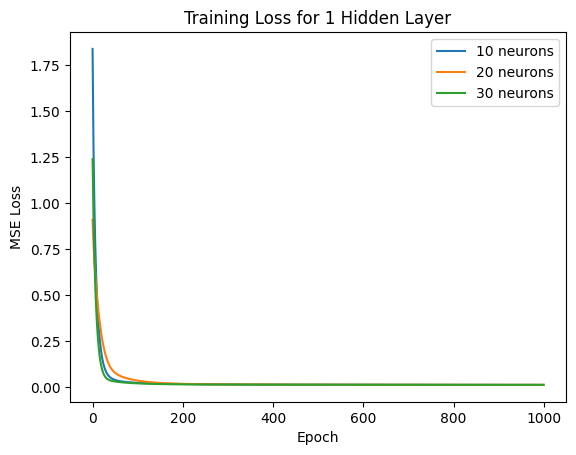

In [0]:
# =========================
# EXPERIMENT 9
# lINEAR hidden neuron
# Regression output (paddy yield)
# =========================
# -----------------------------
# 1. Network configuration
# -----------------------------
np.random.seed(42)

n_inputs = X_train.shape[1]
n_hidden_list = [10, 20, 30]  # first 10 neurons, then 20 neurons
n_output = 1
lr = 0.01
epochs = 1000

# Activation function
def linear(x):
    return x
def linear_derivative(x):
    return np.ones_like(x)

# -----------------------------
# 2. Training loop for different hidden neurons
# -----------------------------
for n_hidden in n_hidden_list:
    # Initialize weights
    W1 = np.random.randn(n_hidden, n_inputs) * np.sqrt(1. / n_inputs)
    W2 = np.random.randn(n_output, n_hidden) * np.sqrt(1. / n_hidden)

    loss_history = []

    for epoch in range(epochs):
        # --- Forward pass ---
        Z1 = np.dot(X_train, W1.T)
        A1 = (Z1)
        Z2 = np.dot(A1, W2.T)
        y_pred = Z2  # linear output

        # --- Loss ---
        loss = np.mean((y_train_scaled - y_pred)**2)
        loss_history.append(loss)

        # --- Backpropagation ---
        dL_dy = 2 * (y_pred - y_train_scaled) / y_train_scaled.shape[0]
        dL_dW2 = np.dot(dL_dy.T, A1)
        dL_dA1 = np.dot(dL_dy, W2)
        dL_dZ1 = dL_dA1 * linear_derivative(Z1)
        dL_dW1 = np.dot(dL_dZ1.T, X_train)

        # --- Update weights ---
        W1 -= lr * dL_dW1
        W2 -= lr * dL_dW2

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Hidden neurons: {n_hidden}, Epoch {epoch}, Loss: {loss:.4f}")

    # --- Plot training loss ---
    plt.plot(loss_history, label=f'{n_hidden} neurons')

plt.title("Training Loss for 1 Hidden Layer")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

In [0]:
# TESTING ON THE X_TEST
Z1_test = np.dot(X_test, W1.T)
A1_test = (Z1_test)
Z2_test = np.dot(A1_test, W2.T)
y_test_pred = Z2_test

test_loss = np.mean((y_test_scaled - y_test_pred)**2)
print(f"Test Loss: {test_loss:.4f}")
RMSE = np.sqrt(test_loss)
print(f"Test RMSE Loss: {RMSE}")

# testing on the original data:
y_test_pred_original = y_test_pred * y_std + y_mean
y_test_original = y_test 
test_loss_original = np.mean((y_test_original - y_test_pred_original)**2)
print("Test MSE Loss (original units):", test_loss_original)

rmse_original = np.sqrt(test_loss_original)  
print(f"Test RMSE Loss (original units: {rmse_original}")

# Compute relative RMSE
mean_yield = np.mean(y_test)
relative_rmse_percent = (rmse_original / mean_yield) * 100

# Print results
print(f"Test MSE Loss (original units): {test_loss_original:.2f} KG")
print(f"Test RMSE Loss (original units): {rmse_original:.2f} KG")
print(f"Relative RMSE (% of mean yield): {relative_rmse_percent:.2f}%")

Test Loss: 0.0125
Test RMSE Loss: 0.111614383382236
Test MSE Loss (original units): 1064706.7844391672
Test RMSE Loss (original units: 1031.8462988445358
Test MSE Loss (original units): 1064706.78 KG
Test RMSE Loss (original units): 1031.85 KG
Relative RMSE (% of mean yield): 4.54%


In [0]:
print("y_test_pred_original min, max, mean:", y_test_pred_original.min(), y_test_pred.max(), y_test_pred.mean())

y_test_pred_original min, max, mean: 4382.6757790770425 1.636294919535339 0.026079235929815203


In [0]:

y_test_pred

array([[ 0.19393241],
       [ 0.21501535],
       [ 0.18613149],
       [ 0.8835655 ],
       [-0.46043516],
       [ 1.56534619],
       [-1.23433041],
       [ 0.88083322],
       [ 0.20367441],
       [-0.51547105],
       [ 0.18337443],
       [ 0.18175806],
       [ 0.85947481],
       [ 0.87108521],
       [-1.22461954],
       [-1.23489436],
       [-1.87764552],
       [ 1.61599494],
       [ 0.88705931],
       [ 0.89657164],
       [ 0.21169417],
       [-1.19313255],
       [-1.78657123],
       [-1.24027866],
       [-0.46317649],
       [-0.44637032],
       [-1.22272001],
       [ 0.86453441],
       [-0.46160166],
       [-0.49826723],
       [-0.46160166],
       [ 0.87877009],
       [ 0.87164916],
       [ 0.86453441],
       [-1.93318493],
       [ 0.19772616],
       [-0.52169715],
       [ 1.63629492],
       [ 0.87670876],
       [ 0.17047237],
       [ 0.90874599],
       [-1.17616279],
       [ 0.87270759],
       [-1.94420643],
       [ 0.92309771],
       [ 0

# Experiment 13 B: 
Reducing the Learning rate to 0.001
The results show increase of the training MSE, test MSE and RMSE relative performance of 5.92% in comparision to the previous experiments

In [0]:
pip install tensorflow


Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


# Experiment 14: TensorFlow/Keras:  Tanh with 30 Neurons in one layer and output activation: linear

In [0]:
# t continuous columns to standardize (0–25)
cont_cols = X_train.columns[0:26]   # numeric continuous features
other_cols = X_train.columns[26:]   # sin/cos + one-hot categorical

# Compute mean and std only for continuous columns
X_mean = X_train[cont_cols].mean()
X_std = X_train[cont_cols].std()

# Standardize continuous columns
X_train_scaled_cont = (X_train[cont_cols] - X_mean) / X_std
X_test_scaled_cont  = (X_test[cont_cols]  - X_mean) / X_std

# Keep other columns unchanged
X_train_other = X_train[other_cols]
X_test_other  = X_test[other_cols]

# Combine standardized continuous + unchanged columns
X_train= pd.concat([X_train_scaled_cont, X_train_other], axis=1)
X_test  = pd.concat([X_test_scaled_cont, X_test_other], axis=1)

# computing the mean and std for y_train 
y_mean = np.mean(y_train, axis=0)
y_std = np.std(y_train, axis=0)

# standardising the y_train and y_test
y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

# y_train may be pandas Series
y_train_scaled = np.asarray(y_train_scaled).reshape(-1, 1)

# y_test_scaled is already numpy
y_test_scaled = np.asarray(y_test_scaled).reshape(-1, 1)

if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy().reshape(-1,1)
else:
    y_test = y_test.reshape(-1,1)

/local_disk0/.ephemeral_nfs/envs/pythonEnv-ac12fd5c-1890-47ff-a38a-22aca69a45ab/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


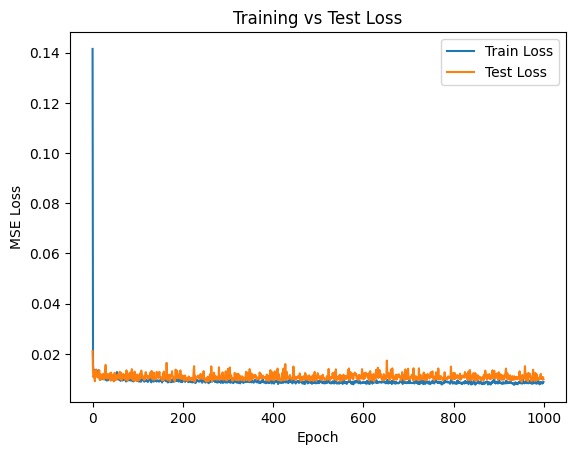

Test MSE Loss: 0.0099
Test RMSE: 0.0996
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test MSE Loss (original units): 848112.28 KG
Test RMSE Loss (original units): 920.93 KG
Relative RMSE (% of mean yield): 4.05%


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# -----------------------------
# 2. Build Model
# -----------------------------
model = Sequential([
    Dense(30, input_dim=X_train.shape[1], activation='tanh'),  # Hidden layer with 30 neurons
    Dense(1, activation='linear')                               # Output layer
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse')

# -----------------------------
# 3. Train Model
# -----------------------------
history = model.fit(X_train, y_train_scaled, epochs=1000, batch_size=32,
                    validation_data=(X_test, y_test_scaled), verbose=0)

# -----------------------------
# 4. Plot Training & Validation Loss
# -----------------------------
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Test Loss')
plt.legend()
plt.show()

# -----------------------------
# 5. Evaluate on Test Data
# -----------------------------
test_loss = model.evaluate(X_test, y_test_scaled, verbose=0)
print(f"Test MSE Loss: {test_loss:.4f}")
rmse = np.sqrt(test_loss)
print(f"Test RMSE: {rmse:.4f}")

# -----------------------------
# 5. Predict on Test Data and Convert to Original Units
# -----------------------------
y_test_pred_scaled = model.predict(X_test)
y_test_pred_original = y_test_pred_scaled * y_std + y_mean   # Rescale back to original units

# Compute loss in original units
test_loss_original = np.mean((y_test - y_test_pred_original)**2)
rmse_original = np.sqrt(test_loss_original)

# Compute relative RMSE
mean_yield = np.mean(y_test)
relative_rmse_percent = (rmse_original / mean_yield) * 100

# Print results
print(f"Test MSE Loss (original units): {test_loss_original:.2f} KG")
print(f"Test RMSE Loss (original units): {rmse_original:.2f} KG")
print(f"Relative RMSE (% of mean yield): {relative_rmse_percent:.2f}%")

### Differences between the from-scratch model and Keras model

Architecture : Same architecture for from scratch and keras model. So the mathematical model is the same.
The main differences are not in architecture ((4.09% vs 4.32%)) they are in optimization and training mechanics.

1. Optimizer: In manual implementation, plain Gradient Descent with fixed learning rate = 0.01 is being used. It also uses full dataset each step. But in Keras implementation, Adam optimizer is used. This uses adaptive learning rates, uses momentum and adjusts updates per parameter, which converges faster. Escapes flat regions better. Adam is simply more advanced than vanilla gradient descent.

2. Mini-batch Training: In manual version, full-batch gradient descent is used. But in Keras, batch_size=32 is used (mini-batch gradient descent). This mini batch training adds controlled noise to gradients often improves generalization and reduce overfitting. Helps escape poor local minima, which can improve RMSE slightly.

3. Numerical Stability & Implementation Efficiency: In  TensorFlow, highly optimized, uses stable matrix operations and better floating-point handling and efficient memory management. In NumPy version, correct mathematically, not optimized at deep framework level. This can cause small differences in convergence quality.

4. Weight Initialization Subtleties: Even though both use Xavier-style scaling, TensorFlow's Dense layer may apply slightly different initialization logic. Adam interacts differently with initial weights. Small initialization differences can cause different local minimum.

5. Results: Manual (1 hidden tanh)	4.32%;  Manual (2 hidden tanh)	4.51%, keras (tanh + Adam)	4.09%. The difference is small. This shows that the manual math implementation is correct, gradients are correct and understanding is solid. The improvement comes from better optimization, not a different model.

# Experiment 15: TensorFlow/Keras (Sigmoid in the hidden layer and linear in the output layer)

In [0]:
cont_cols = X_train.columns[0:26]   # numeric continuous features
other_cols = X_train.columns[26:]   # sin/cos + one-hot categorical

# Compute mean and std only for continuous columns
X_mean = X_train[cont_cols].mean()
X_std = X_train[cont_cols].std()

# Standardize continuous columns
X_train_scaled_cont = (X_train[cont_cols] - X_mean) / X_std
X_test_scaled_cont  = (X_test[cont_cols]  - X_mean) / X_std

# Keep other columns unchanged
X_train_other = X_train[other_cols]
X_test_other  = X_test[other_cols]

# Combine standardized continuous + unchanged columns
X_train= pd.concat([X_train_scaled_cont, X_train_other], axis=1)
X_test  = pd.concat([X_test_scaled_cont, X_test_other], axis=1)

# computing the mean and std for y_train 
y_mean = np.mean(y_train, axis=0)
y_std = np.std(y_train, axis=0)

# standardising the y_train and y_test
y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

# y_train may be pandas Series
y_train_scaled = np.asarray(y_train_scaled).reshape(-1, 1)

# y_test_scaled is already numpy
y_test_scaled = np.asarray(y_test_scaled).reshape(-1, 1)

if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy().reshape(-1,1)
else:
    y_test = y_test.reshape(-1,1)

In [0]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# -----------------------------
# 2. Define the model
# -----------------------------
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # 43 features
    Dense(20, activation='sigmoid'),          # Hidden layer, 20 neurons
    Dense(1, activation='linear')             # Output layer, linear
])

# -----------------------------
# 3. Compile the model
# -----------------------------
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='mse',
              metrics=['mse'])

# -----------------------------
# 4. Train the model
# -----------------------------
history = model.fit(X_train, y_train_scaled,
                    epochs=500,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=2)

# -----------------------------
# 5. Evaluate on test set
# -----------------------------
test_loss, test_mse = model.evaluate(X_test, y_test_scaled, verbose=0)
print("\nTest MSE Loss (scaled y):", test_mse)

rmse = np.sqrt(test_mse)
print(f"Test RMSE Loss (scaled y): {rmse:.4f}")

# Convert predictions back to original scale
y_test_pred = model.predict(X_test)

Epoch 1/500
63/63 - 1s - 12ms/step - loss: 0.1713 - mse: 0.1713 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2/500
63/63 - 0s - 4ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3/500
63/63 - 0s - 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 4/500
63/63 - 0s - 4ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 5/500
63/63 - 0s - 2ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 6/500
63/63 - 0s - 2ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 7/500
63/63 - 0s - 2ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 8/500
63/63 - 0s - 2ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 9/500
63/63 - 0s - 2ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 10/500
63/63 - 0s - 2ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0080 - val_mse: 0.008

In [0]:
y_test_pred_original = y_test_pred * y_std + y_mean
y_test_original = y_test

test_loss_original = np.mean((y_test_original - y_test_pred_original)**2)
print("Test MSE Loss (original units):", test_loss_original)

rmse_original = np.sqrt(test_loss_original)

# Compute relative RMSE
mean_yield = np.mean(y_test)
relative_rmse_percent = (rmse_original / mean_yield) * 100

# Print results
print(f"Test MSE Loss (original units): {test_loss_original:.2f} KG")
print(f"Test RMSE Loss (original units): {rmse_original:.2f} KG")
print(f"Relative RMSE (% of mean yield): {relative_rmse_percent:.2f}%")

Test MSE Loss (original units): 767312.316632208
Test MSE Loss (original units): 767312.32 KG
Test RMSE Loss (original units): 875.96 KG
Relative RMSE (% of mean yield): 3.86%


The starting loss is already very small at Epoch 1 (0.2822 quickly drops to ~0.013). Because OF Adam optimizer, Mini-batch training (batch_size default or specified), better weight initialization.  In Keras, one epoch = many mini-batch updates. If there are 63 steps per epoch, it means 63 gradient updates happen in 1 epoch. So by the time Epoch 1 finishes, the model has already updated weights 63 times. In manual NumPy version, 1 epoch = one update (full batch). Much slower learning per epoch. So the comparison is not 1-to-1. Adam and this mini-batch leads to very aggressive early optimization. Adam uses momentum, uses adaptive learning rates. So loss drops dramatically in first few epochs.

In [0]:
pd.set_option('float_format', '{:.2f}'.format)
X_train.describe()


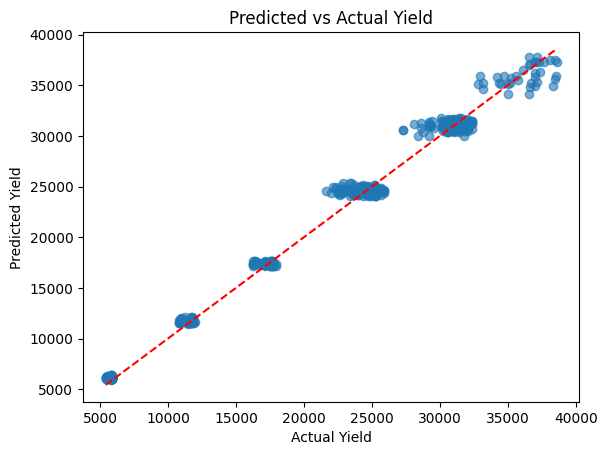

In [0]:
plt.scatter(y_test_original, y_test_pred_original, alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--')  # perfect line
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Predicted vs Actual Yield")
plt.show()



# References:
1. GeeksforGeeks (2024). Building Artificial Neural Networks (ANN) from Scratch. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/deep-learning/building-artificial-neural-networks-ann-from-scratch/.
2. https://www.facebook.com/jason.brownlee.39 (2016). How to Code a Neural Network with Backpropagation In Python. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/.
3.  Uci.edu. (2025). UCI Machine Learning Repository. [online] Available at: https://archive.ics.uci.edu/dataset/1186/paddy+dataset.